In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\richa\\Downloads\\ML_A2_data\\Salary.csv")
# rename a column, experience is in years
df.rename(columns={'Experience (Years)':'Experience'}, inplace=True)
# drop the rows with missing values
df.dropna(inplace=True)
df.head(10)

,First Name,Last Name,Education,Occupation,Experience,Salary
0,Freddie,Smith,Doctoral,Baker,8,142875
1,Robert,Ferguson,Primary,Economist,12,61430
2,Adele,Harrison,Primary,Electrician,17,121282
3,Miranda,Alexander,Doctoral,Producer,8,35637
4,Julia,Cole,Primary,Agronomist,24,75653
5,Edgar,Wells,Doctoral,Salesman,3,78059
6,Kristian,Owens,Upper secondary,Police Officer,1,109988
7,Adele,Taylor,Upper secondary,Fine Artist,15,179030
8,Lucia,Craig,Upper secondary,Medic,7,161817
9,Kristian,Ross,Doctoral,Interior Designer,5,64592


## Supervised
## Q1

[[112877.48129089]
 [  -322.44497442]]


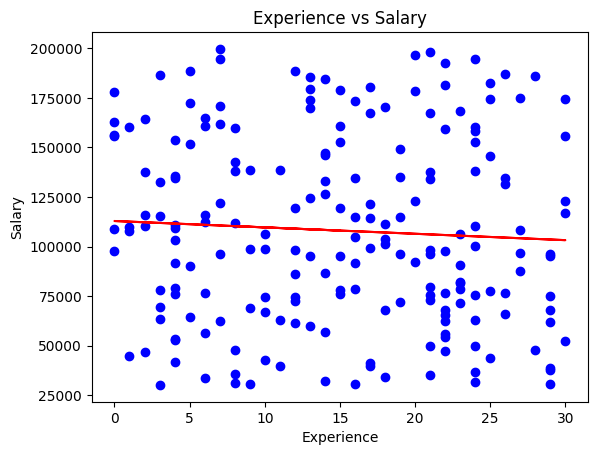

In [3]:
X = df["Experience"]
# print(X.shape)
y = df["Salary"]
# print(y.shape)
X = np.c_[np.ones(X.shape[0]), X]
X = np.matrix(X)
y = np.matrix(y).T
coeff = np.linalg.inv(X.T*X)*X.T*y

y_pred_exp = X*coeff
print(coeff)

plt.plot(X[:,1], y_pred_exp, color='red')
plt.scatter([X[:,1]],[y], color='blue')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

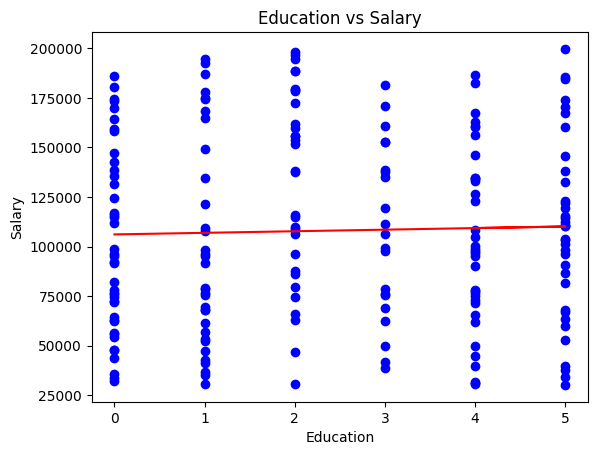

In [4]:
edu = df['Education']
categories_of_edu = edu.unique()
# print(categories_of_edu) 
# assign a number to each category in categories_of_edu
edu_dict = {}
for i in range(len(categories_of_edu)):
    edu_dict[categories_of_edu[i]] = i
# print(edu_dict)
# replace each category in the column education with the number assigned to it
X = df['Education'].replace(edu_dict)

y = df["Salary"]
# print(y.shape)
X = np.c_[np.ones(X.shape[0]), X]
X = np.matrix(X)
y = np.matrix(y).T
coeff = np.linalg.inv(X.T*X)*X.T*y

y_pred_edu = X*coeff
# print(coeff)

plt.plot(X[:,1], y_pred_edu, color='red')
plt.scatter([X[:,1]],[y], color='blue')
plt.xlabel("Education")
plt.ylabel("Salary")
plt.title("Education vs Salary")
plt.show()

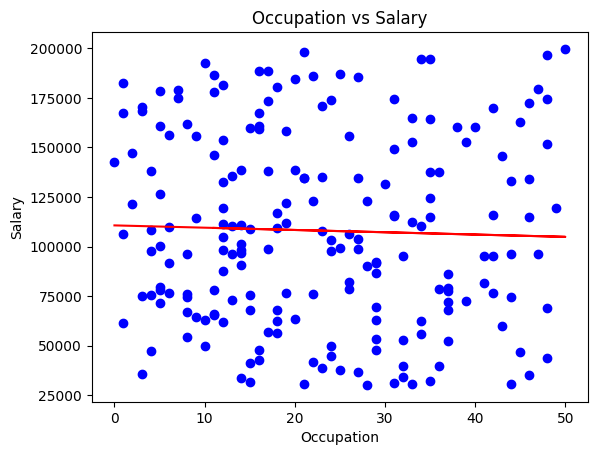

In [5]:
occ = df['Occupation']
categories_of_occ = occ.unique()
# print(categories_of_edu) 
# assign a number to each category in categories_of_edu
occ_dict = {}
for i in range(len(categories_of_occ)):
    occ_dict[categories_of_occ[i]] = i
# print(occ_dict)
# replace each category in the column education with the number assigned to it
X = df['Occupation'].replace(occ_dict)

y = df["Salary"]
# print(y.shape)
X = np.c_[np.ones(X.shape[0]), X]
X = np.matrix(X)
y = np.matrix(y).T
coeff = np.linalg.inv(X.T*X)*X.T*y

y_pred_occ = X*coeff
# print(coeff)

plt.plot(X[:,1], y_pred_occ, color='red')
plt.scatter([X[:,1]],[y], color='blue')
plt.xlabel("Occupation")
plt.ylabel("Salary")
plt.title("Occupation vs Salary")
plt.show()


## Q2 
R square shows the goodness of fit of a model. It is the proportion of the variance in the dependent variable that is predictable from the independent variable. It is a measure of how well the regression line fits the observed data points. The value of R square is between 0 and 1. The higher the value of R square, the better the model fits the data.

In [6]:
def r_square(y, y_pred):
    y_mean = np.mean(y)
    ss_tot = np.sum(np.square(y-y_mean))
    ss_res = np.sum(np.square(y-y_pred))
    # print(ss_res, ss_tot)
    r2 = 1 - (ss_res/ss_tot)
    return r2

print("R2 for experience: ", r_square(y, y_pred_exp))
print("R2 for education: ", r_square(y, y_pred_edu))
print("R2 for occupation: ", r_square(y, y_pred_occ))


R2 for experience:  0.003463147394885513
R2 for education:  0.0009263437348048242
R2 for occupation:  0.001070092071818629


## Q3
1. Polynomial Regression

In [7]:
edu = df['Education']
categories_of_edu = edu.unique()
# print(categories_of_edu) 
# assign a number to each category in categories_of_edu
edu_dict = {}
for i in range(len(categories_of_edu)):
    edu_dict[categories_of_edu[i]] = i
# print(edu_dict)
# replace each category in the column education with the number assigned to it
df["Education"] = df['Education'].replace(edu_dict)

# X = df["Education"]
# print(X.shape)
occ = df['Occupation']
categories_of_occ = occ.unique()
# print(categories_of_occ)
# assign a number to each category in categories_of_occ
occ_dict = {}
for i in range(len(categories_of_occ)):
    occ_dict[categories_of_occ[i]] = i
# print(occ_dict)
# replace each category in the column occupation with the number assigned to it
df['Occupation'] = df['Occupation'].replace(occ_dict)
y = df["Salary"]
X = df.drop(['Salary','First Name','Last Name'], axis=1)
# print(X.head(10), y.head(10))
# print(y.shape)
X = np.c_[np.ones(X.shape[0]), X]
# sqaure X education, experience and occupation columns and add them to X
X = np.c_[X, np.square(X[:,1]),np.square(X[:,2]), np.square(X[:,3])]
# X_test = np.c_[np.ones(X_test.shape[0]), X_test]
X = np.matrix(X)
y = np.matrix(y).T
coeff = np.linalg.inv(X.T*X)*X.T*y
# print(X, X.shape)
# X_test = np.matrix(X_test)
# y_test = np.matrix(y_test).T
y_pred_all3 = X*coeff
# print(coeff)
# find r2 score for all 3
print("R2 for all 3 using Polynomial Regression: ", r_square(y, y_pred_all3))
# print(y_pred_all3.shape, y.shape)

# plt.plot(X[:,1], y_pred_all3, color='red')
# y_test = y_test.values.reshape(-1,1)
# make y_test a 1d array
# y_test = np.array(y_test).reshape(-1)
# print(y_test.shape)
# print(X_test[:,1].shape)
# plt.scatter([X[:,1]],[y], color='blue')

# plt.scatter(X_test[:,1], y_test, color='blue')
# plt.show()

R2 for all 3 using Polynomial Regression:  0.030359223088403886


2. Multiple Linear Regression

In [8]:
X = df.drop(['Salary','First Name','Last Name'], axis=1)
y = df["Salary"]
# print(X.head(10), y.head(10))
X = np.c_[np.ones(X.shape[0]), X] # add a column of ones to X
X = np.matrix(X)
y = np.matrix(y).T
coeff = np.linalg.inv(X.T*X)*X.T*y
y_pred_all3 = X*coeff
# print(coeff)
# print(X.shape, y.shape)
print("R2 for all 3 using Multiple Linear Regression: ", r_square(y, y_pred_all3))

R2 for all 3 using Multiple Linear Regression:  0.005855813055619219


Polynomial regression has a higher R square value than multiple linear regression. It means that polynomial regression fits the data better than multiple linear regression.
## Q4



In [9]:
# PCA
# standardize features :edu, occ and exp 
mean_exp = np.mean(df['Experience'])
std_exp = np.std(df['Experience'])
# print(mean_exp, std_exp)
df['Experience'] = (df['Experience'] - mean_exp)/std_exp
mean_edu = np.mean(df['Education'])
std_edu = np.std(df['Education'])
df['Education'] = (df['Education'] - mean_edu)/std_edu
# print(mean_edu, std_edu)
mean_occ = np.mean(df['Occupation'])
std_occ = np.std(df['Occupation'])
df['Occupation'] = (df['Occupation'] - mean_occ)/std_occ
# print(mean_occ, std_occ)
# print(df.head(20))
X_scaled = df.drop(['Salary','First Name','Last Name'], axis=1)
# print(X_scaled.head(10))
X_scaled = np.array(X_scaled)
# print(X_scaled[:5])

# find covariance matrix
features = X_scaled.T
cov_matrix = np.cov(features)
print(cov_matrix[:5])	
# print(features.shape)
# eigen decomposition
vals, vecs = np.linalg.eig(cov_matrix)
sorted_ind = np.argsort(vals)[::-1]
vals = vals[sorted_ind]
vecs = vecs[:,sorted_ind]
n_comps = 2
selected_vecs = vecs[:,:n_comps]
# print(selected_vecs.shape)
trans_data = np.dot(selected_vecs.T, features)
# new X matrix after PCA
trans_data = trans_data.T # nx2 matrix
# print(trans_data[:5])	
# print(vals[:5], vecs[:5])
# var per principal component
# var_per = vals/np.sum(vals)
# print("Variance per each principal component: ", var_per[:5])

[[ 1.00502513  0.01293462  0.00631634]
 [ 0.01293462  1.00502513 -0.08101506]
 [ 0.00631634 -0.08101506  1.00502513]]


In [10]:
# perform linear regression on trans_data and y
trans_data = np.c_[np.ones(trans_data.shape[0]), trans_data] # add a column of ones to X
X = np.matrix(trans_data)
y = np.matrix(y)
# print(X.shape, y.shape)
coeff = np.linalg.inv(X.T*X)*X.T*y
y_pred_all3 = X*coeff
# print(coeff)
# print(X.shape, y.shape)
# print(X)
print("R2 for all 3 after PCA using Multiple Linear Regression: ", r_square(y, y_pred_all3))

R2 for all 3 after PCA using Multiple Linear Regression:  0.0007060690137855596


I have reduced the number of dimensions from 3 to 2 using pca. The R square value in this case is worse than the R square value in Q3. It means that the feature which contributed significantly to the model was given a low weight. So, it was not a good idea to perform pca in this case.

## Q5
The R square value does not change too much as the covariance between features was less than 0.3. So. even after orthogonalising the matrix, the R square value remains almost the same.

In [11]:
df.head(10)
X = df.drop(['Salary','First Name','Last Name'], axis=1)
# print(X.head())
y = df["Salary"]
# print(X.corr())
# check if features are orthogonal
# print(np.dot(X, X.T)[:1])
# features not orthogonal, apply gram schmidt
def gramschmidt(A):

    R = np.zeros((A.shape[1], A.shape[1]))
    Q = np.zeros(A.shape)
    for k in range(0, A.shape[1]):
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1, A.shape[1]):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
    return Q, R
A = X.to_numpy()
Q, _ = gramschmidt(A)
print("Check for identity matrix: ", np.dot(Q.T, Q))
# convert Q to dataframe
X = pd.DataFrame(Q)
# print(X.head())
orthogonalised_exp = X[2]
X = np.c_[np.ones(X.shape[0]), X] # add a column of ones to X
X = np.matrix(X)
y = np.matrix(y).T
coeff = np.linalg.inv(X.T*X)*X.T*y
y_pred_all3 = X*coeff
# print(coeff)
# print(X.shape, y.shape)
print("R2 for all 3 using Multiple Linear Regression after gram Schmidt: ", r_square(y, y_pred_all3))







Check for identity matrix:  [[ 1.00000000e+00  1.14744732e-16 -2.58665959e-17]
 [ 1.14744732e-16  1.00000000e+00 -1.08123637e-17]
 [-2.58665959e-17 -1.08123637e-17  1.00000000e+00]]
R2 for all 3 using Multiple Linear Regression after gram Schmidt:  0.005855813055619219


## Q6 

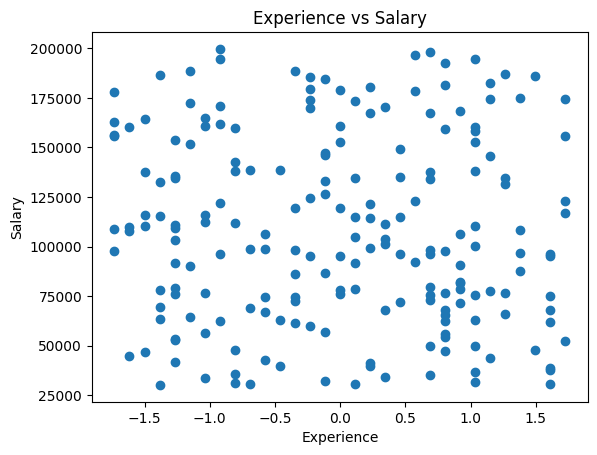

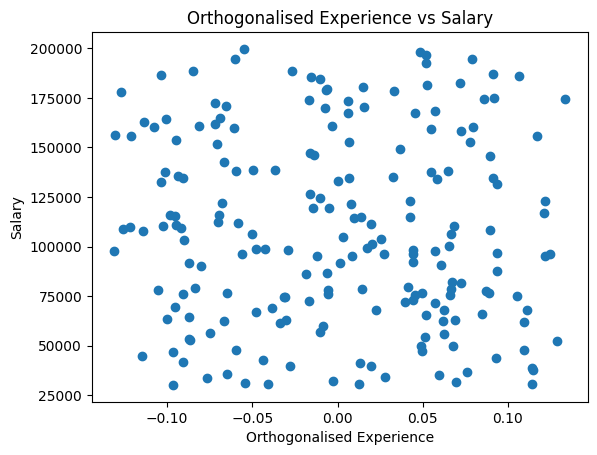

In [12]:
# make a scatter plot of experience vs salary
plt.scatter(df['Experience'], df['Salary'])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()
# make a scatter plot of orthogonalised_exp vs salary
plt.scatter(orthogonalised_exp, df['Salary'])
plt.xlabel("Orthogonalised Experience")
plt.ylabel("Salary")
plt.title("Orthogonalised Experience vs Salary")
plt.show()


There is a slight difference between the above 2 plots. 

In [13]:
df.head(10)


,First Name,Last Name,Education,Occupation,Experience,Salary
0,Freddie,Smith,-1.332897,-1.686889,-0.808704,142875
1,Robert,Ferguson,-0.780973,-1.612544,-0.347575,61430
2,Adele,Harrison,-0.780973,-1.538199,0.228835,121282
3,Miranda,Alexander,-1.332897,-1.463854,-0.808704,35637
4,Julia,Cole,-0.780973,-1.389509,1.035810,75653
5,Edgar,Wells,-1.332897,-1.315164,-1.385114,78059
6,Kristian,Owens,-0.229049,-1.240819,-1.615678,109988
7,Adele,Taylor,-0.229049,-1.166474,-0.001729,179030
8,Lucia,Craig,-0.229049,-1.092129,-0.923986,161817
9,Kristian,Ross,-1.332897,-1.017784,-1.154550,64592


## Unsupervised
Q1

In [14]:
df = pd.read_csv("C:\\Users\\richa\\Downloads\\ML_A2_data\\Airplane.csv")
# df.dropna(inplace=True)
# length of df
print(len(df))
# drop a column
df.drop(['Summary'], axis=1, inplace=True)
# df.head(10)
print(df.info())

5268
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
dtypes: float64(3), object(9)
memory usage: 494.0+ KB
None


In [15]:
df = pd.read_csv("C:\\Users\\richa\\Downloads\\ML_A2_data\\Airplane.csv")
# df.dropna(inplace=True)
# length of df
# print(len(df))
# drop a column
df.drop(['Summary'], axis=1, inplace=True)
# df.head(10)
# print(df.info())
def encode(df):
    for column in df.columns:
        if column not in ['Aboard', 'Fatalities', 'Ground']:
            d = {}
            for i, val in enumerate(df[column].unique()):

                d[val] = i
            df[column] = df[column].map(d)
    return df

df = encode(df)
# print(df.shape)
# df.dropna(inplace=True)
# print(df.shape)
# df.head(10)

def standardize(df):
    for column in df.columns:
        mean = np.mean(df[column])
        std = np.std(df[column])
        df[column] = (df[column] - mean)/std
    return df

df = standardize(df)
# df.head(10)
# check if df has nans
# print("hello",np.isnan(df).any())
cov_matrix = df.cov()
# print(cov_matrix[:5])	
# print(features.shape)
# eigen decomposition
vals, vecs = np.linalg.eig(cov_matrix)
sorted_ind = np.argsort(vals)[::-1]
vals = vals[sorted_ind]
vecs = vecs[:,sorted_ind]
n_comps = 5
selected_vecs = vecs[:,:n_comps]
# print(selected_vecs.shape)
trans_data = np.dot(selected_vecs.T, df.T)
# new X matrix after PCA
trans_data = trans_data.T 
# print(trans_data.shape)
# this is for expplained variance ratio

trans_data = pd.DataFrame(trans_data)
trans_data.dropna(inplace=True)
# print(len(trans_data))
cov_matrix = trans_data.cov()
# check if covariance matrix has nans
# print(np.isnan(cov_matrix).any())
vals, vecs = np.linalg.eig(cov_matrix)
total_vals = np.sum(vals)
var_explained = [(i/total_vals) for i in sorted(vals, reverse=True)]
total_var_explained = np.cumsum(var_explained)
print("Total variance explained by 1st principal component: ", total_var_explained[0])
print("Total variance explained by 1st and 2nd principal component: ", total_var_explained[1])


Total variance explained by 1st principal component:  0.5647652218000989
Total variance explained by 1st and 2nd principal component:  0.7562212620816886


In [16]:
df_wwww = pd.read_csv("C:\\Users\\richa\\Downloads\\ML_A2_data\\Airplane.csv")
df_wwww.drop(['Summary'], axis=1, inplace=True)
def encode(df):
    for column in df.columns:
        if column not in ['Aboard', 'Fatalities', 'Ground']:
            d = {}
            for i, val in enumerate(df[column].unique()):

                d[val] = i
            df[column] = df[column].map(d)
    return df

df_wwww = encode(df_wwww)
print(df_wwww.shape)
df_wwww.dropna(inplace=True)
print(df_wwww.shape)
df_wwww.head(10)

(5268, 12)
(5236, 12)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground
0,0,0,0,0,0,0,0,0,0,2.0,1.0,0.0
1,1,1,1,1,0,1,1,0,1,5.0,5.0,0.0
2,2,2,2,2,1,2,2,0,1,1.0,1.0,0.0
3,3,3,3,3,0,2,3,0,1,20.0,14.0,0.0
4,4,4,4,3,0,2,4,0,1,30.0,30.0,0.0
5,5,5,5,3,0,2,5,0,1,41.0,21.0,0.0
6,6,6,6,3,0,2,6,0,1,19.0,19.0,0.0
7,7,2,7,4,0,2,7,0,1,20.0,20.0,0.0
8,8,5,8,3,0,2,8,0,1,22.0,22.0,0.0
9,9,7,9,3,0,2,9,0,1,19.0,19.0,0.0


In [17]:
df = pd.read_csv("C:\\Users\\richa\\Downloads\\ML_A2_data\\Airplane.csv")
df_transformed = df.copy()
# df.head()
# split df['type'] by spaces and take out the first element
df_transformed['Type'] = df['Type'].str.split().str[0]
# df_transformed.head()
# encode the categorical variable type using dict and map
def encode(df):
    d = {}
    for i, val in enumerate(df_transformed['Type'].unique()):

        d[val] = i
    df_transformed['Type'] = df_transformed['Type'].map(d)
    return df
df_transformed = encode(df_transformed)
df_transformed.head()


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,0,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,1,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,2,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,3,NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,3,NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [18]:
import math
def sil_with_while(ass,cent,cl_count, a):
    ai = []
    count = [0 for _ in range(cl_count)]
    clusters = [[] for _ in range(cl_count)]
    for i in range(len(a)):
        count[ass[i]] += 1
        clusters[ass[i]].append(a[i])
    # check if any count is zero
    flag = 0
    while 0 in count:
        flag =1
        ass,cent = k_means(a,cl_count)
        cl_count = len(cent)
        ai = []
        count = [0 for _ in range(cl_count)]
        clusters = [[] for _ in range(cl_count)]
        for i in range(len(a)):
            count[ass[i]] += 1
            clusters[ass[i]].append(a[i])
    
    # print('clusters here',clusters)
    # print(l2)
    print(count)
    for i in range(cl_count):
        # print(clusters[i])
        sum = 0
        for j in clusters[i]:
            for k in clusters[i]:
                sum+=abs(j-k)
        # print(sum)
        ai.append(sum/(count[i]-1))
    l2 = []
    for i in range(cl_count):
        for j in range(cl_count):
            sum = 0
            if i!=j:
                for k in clusters[i]:
                    for l in clusters[j]:
                        sum+=abs(k-l)
            if count[j]==0:
                l2.append(0)
            else:
                l2.append(sum/(count[j]))
    l2 = [x for x in l2 if x != 0]
    # print(l2)
    si = [0 for _ in range(cl_count)]
    for i in range(cl_count):
        intra = ai[i]
        # print(l2)
        if (cl_count==1):
            b = 0
        else:
            b = min(l2[i*(cl_count-1):i*(cl_count-1)+(cl_count-1)])
        si[i] = (b-intra)/(max(intra,b))
    # print(si)
    s = 0
    for i in si:
        s+=i
    # print(ai)
    # print(l2)
    return s/cl_count


In [19]:
import math
def sil(ass,cent,cl_count, a):
    ai = []
    count = [0 for _ in range(cl_count)]
    clusters = [[] for _ in range(cl_count)]
    for i in range(len(a)):
        count[ass[i]] += 1
        clusters[ass[i]].append(a[i])
    # print('clusters here',clusters)
    # print(l2)
    print(count)
    for i in range(cl_count):
        # print(clusters[i])
        sum = 0
        for j in clusters[i]:
            for k in clusters[i]:
                sum+=abs(j-k)
        # print(sum)
        ai.append(sum/(count[i]-1))
    l2 = []
    for i in range(cl_count):
        for j in range(cl_count):
            sum = 0
            if i!=j:
                for k in clusters[i]:
                    for l in clusters[j]:
                        sum+=abs(k-l)
            l2.append(sum/(count[j]))
    l2 = [x for x in l2 if x != 0]
    # print(l2)
    si = [0 for _ in range(cl_count)]
    for i in range(cl_count):
        intra = ai[i]
        # print(l2)
        if (cl_count==1):
            b = 0
        else:
            b = min(l2[i*(cl_count-1):i*(cl_count-1)+(cl_count-1)])
        si[i] = (b-intra)/(max(intra,b))
    # print(si)
    s = 0
    for i in si:
        s+=i
    # print(ai)
    # print(l2)
    return s/cl_count


## Q2

[517, 275, 477, 658, 102, 486, 1169, 395, 1189]
Silhouette score for k =  9  is:  0.7401883640369654


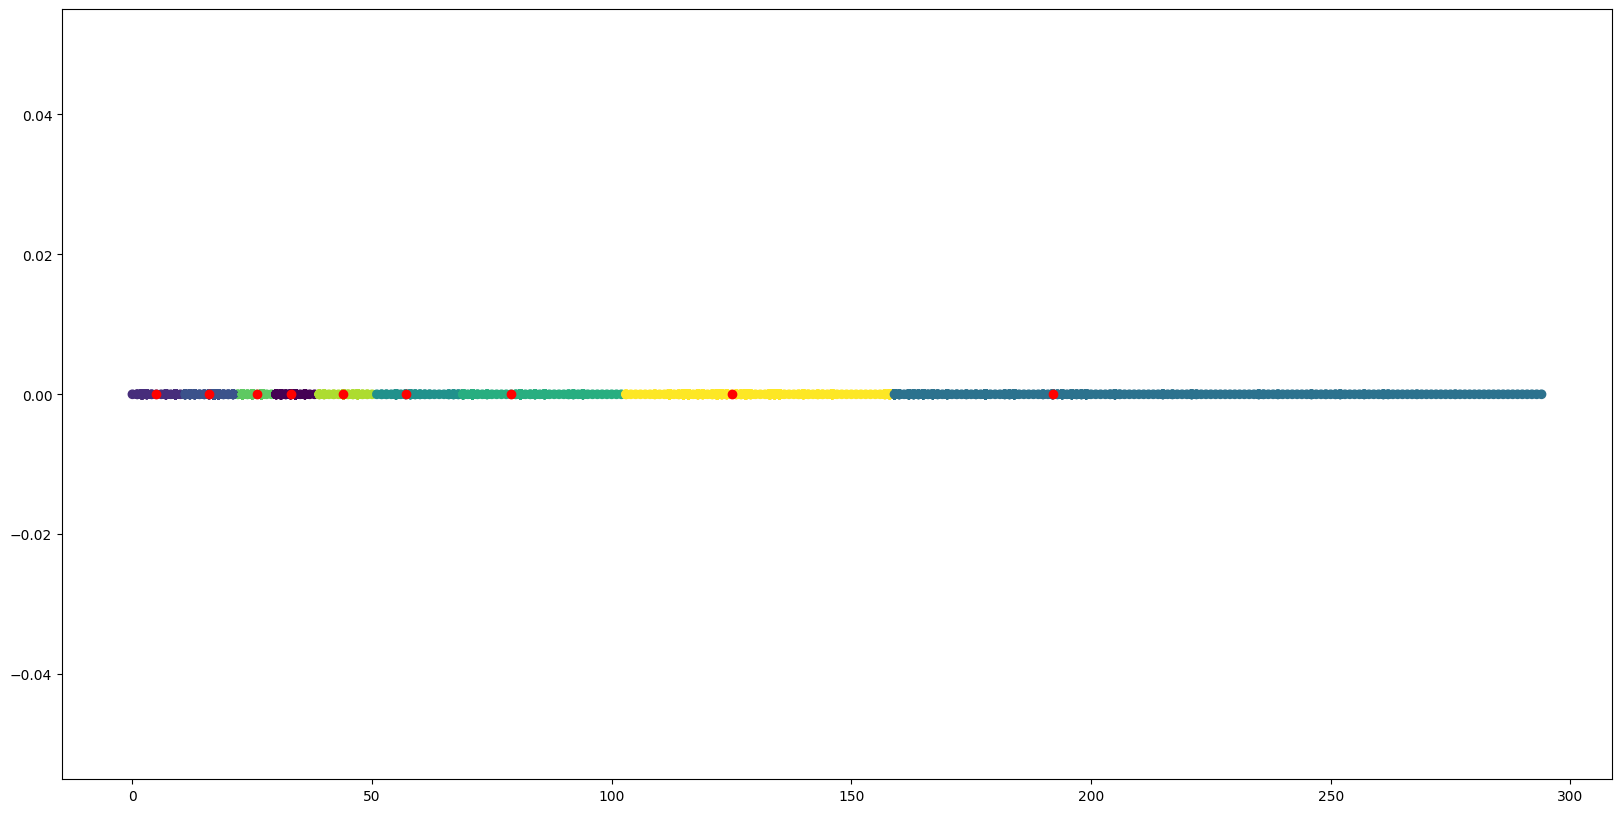

[477, 1129, 243, 131, 275, 54, 1264, 579, 818, 298]
Silhouette score for k =  10  is:  0.6954112708042032


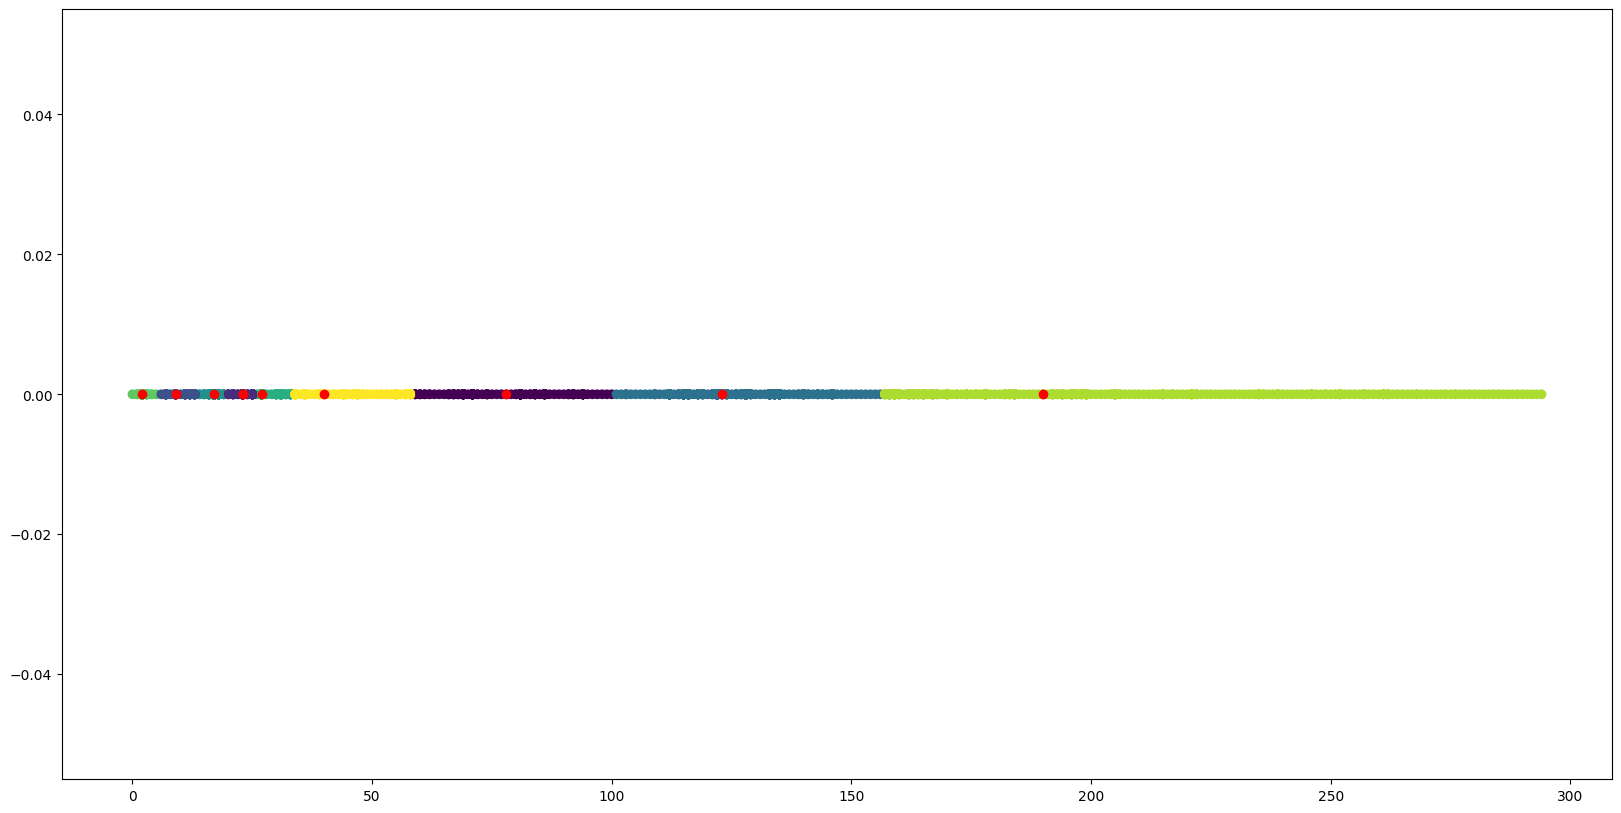

[523, 87, 204, 1169, 473, 274, 403, 1079, 423, 145, 488]
Silhouette score for k =  11  is:  0.7191838835447464


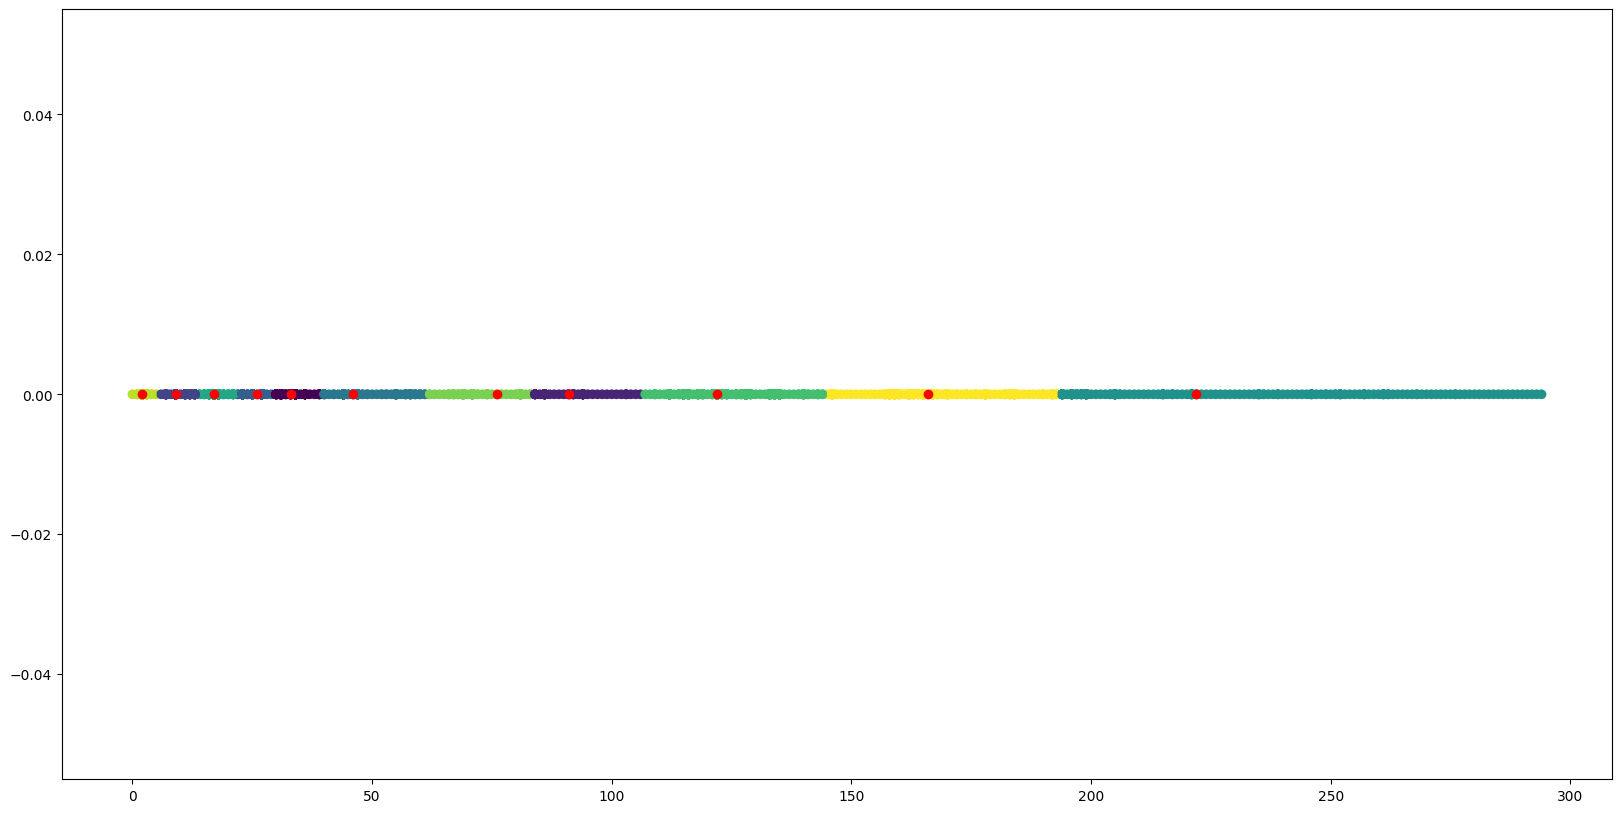

[131, 463, 275, 469, 201, 475, 573, 494, 108, 523, 982, 574]
Silhouette score for k =  12  is:  0.6961702492454062


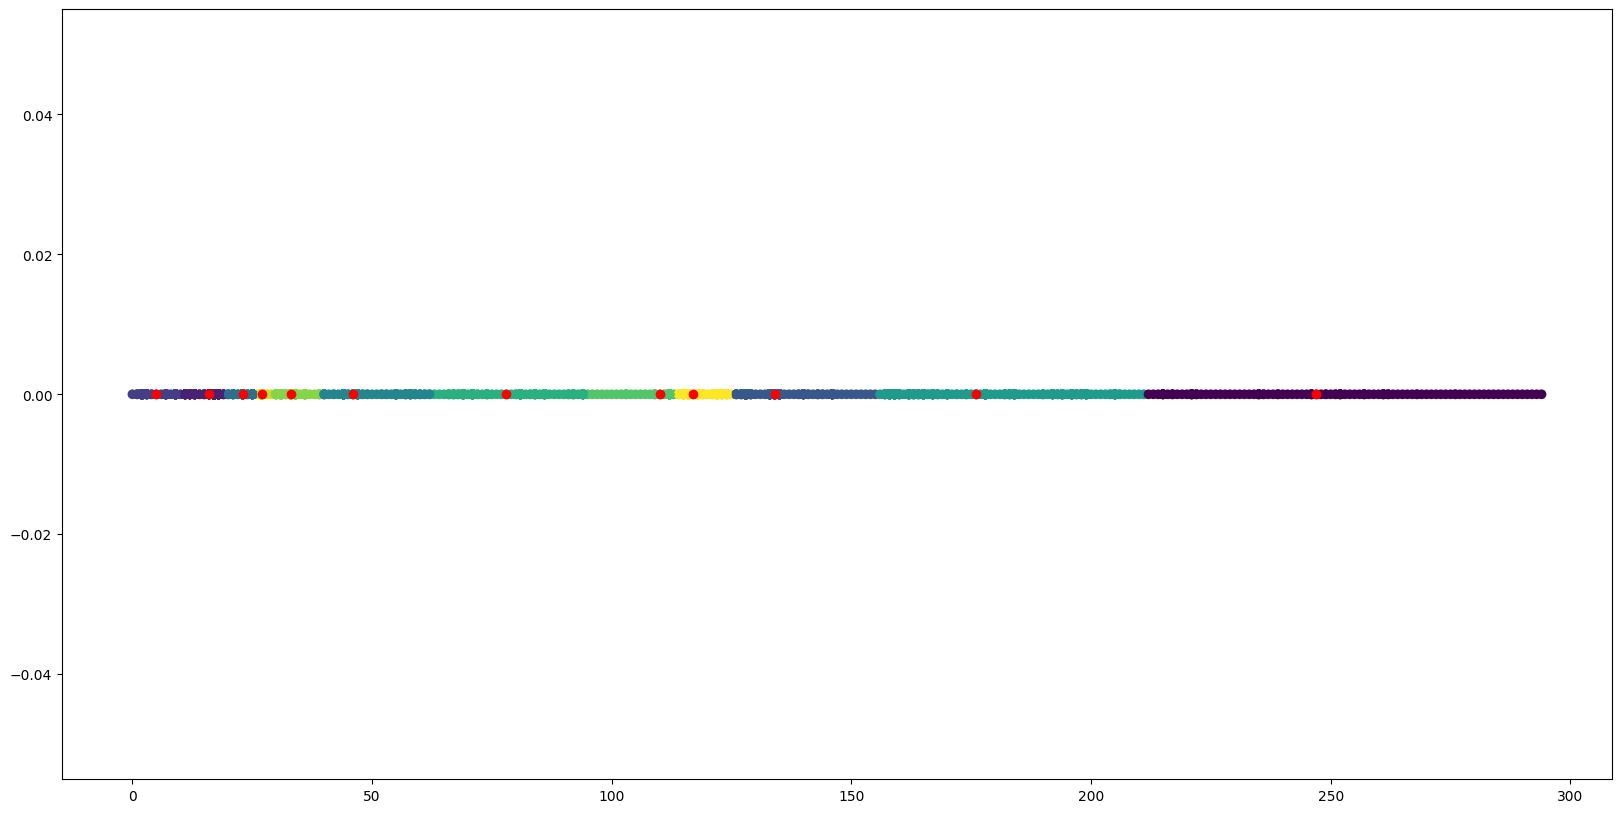

[395, 347, 427, 100, 484, 517, 314, 99, 463, 1035, 664, 148, 275]
Silhouette score for k =  13  is:  0.7561847755389315


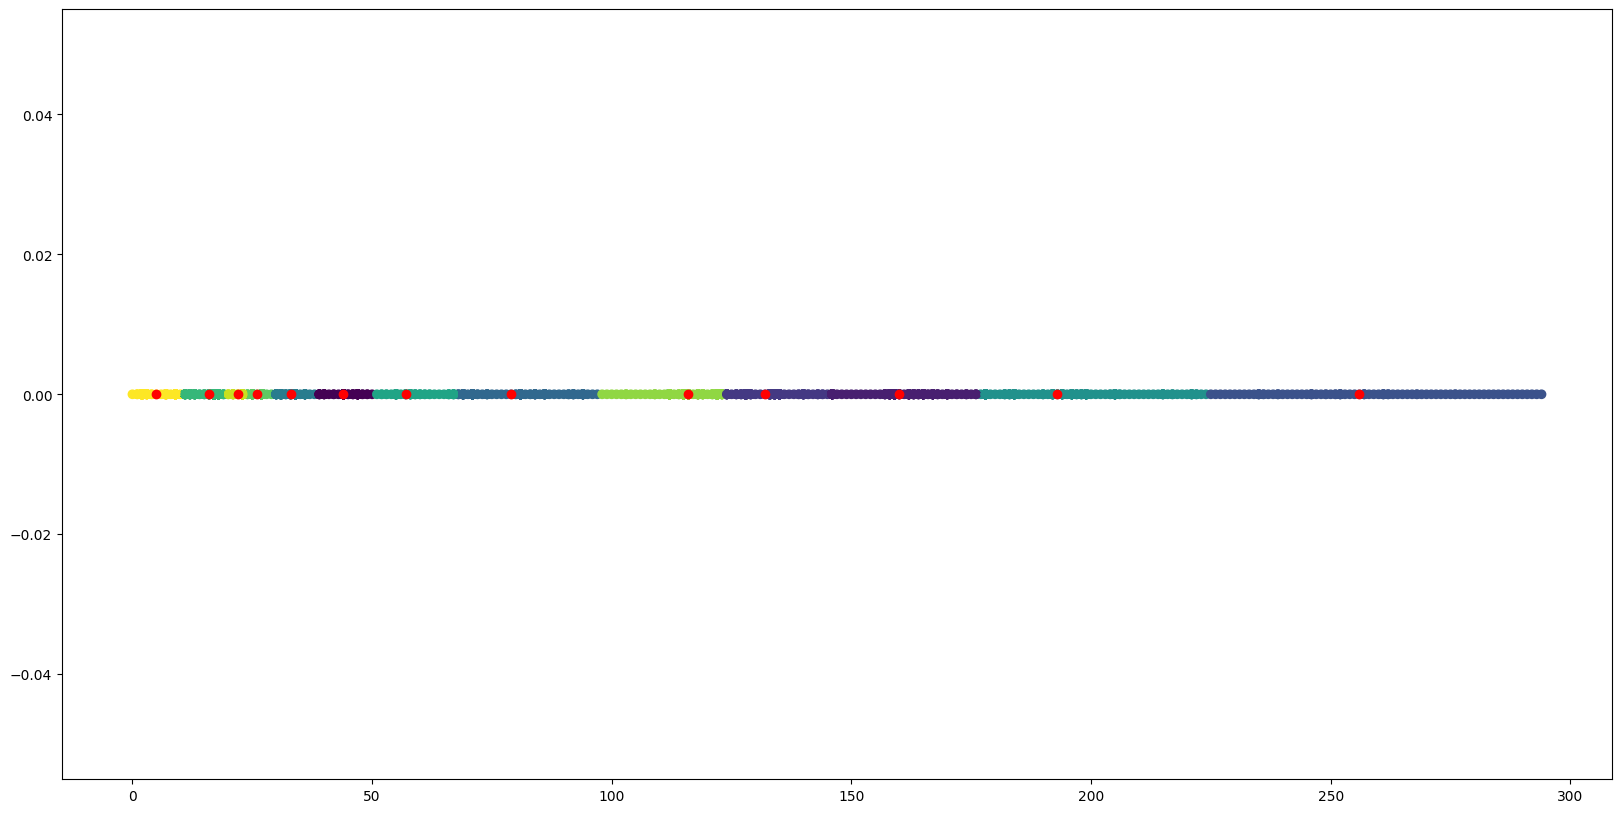

[574, 77, 390, 499, 4, 141, 679, 523, 198, 473, 982, 129, 131, 468]
Silhouette score for k =  14  is:  0.7439506923705103


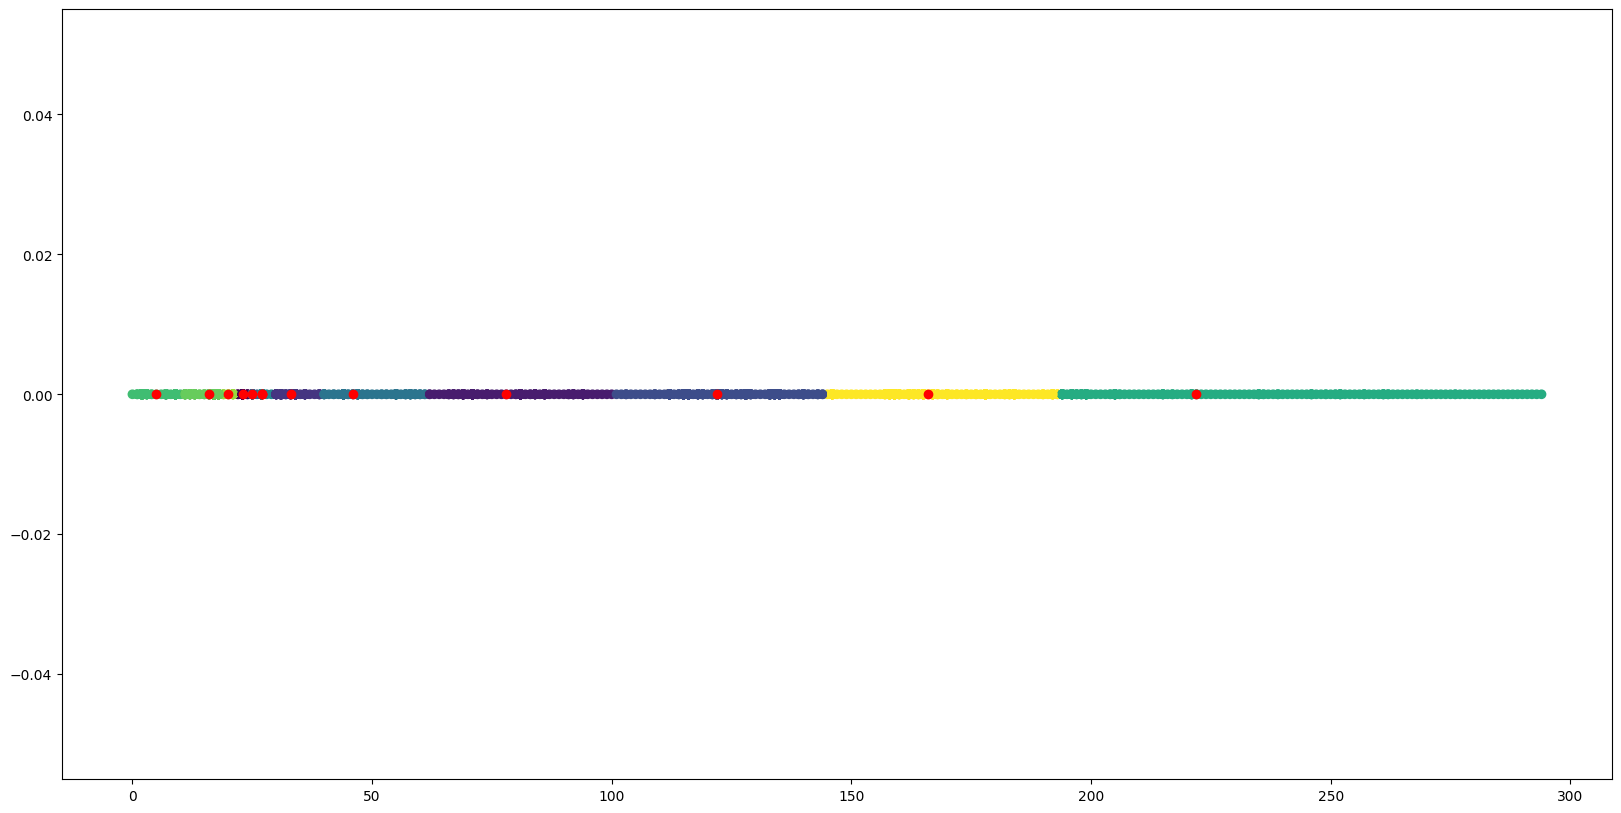

[165, 269, 87, 347, 275, 103, 394, 65, 1180, 517, 413, 314, 573, 466, 100]
Silhouette score for k =  15  is:  0.7462716048343215


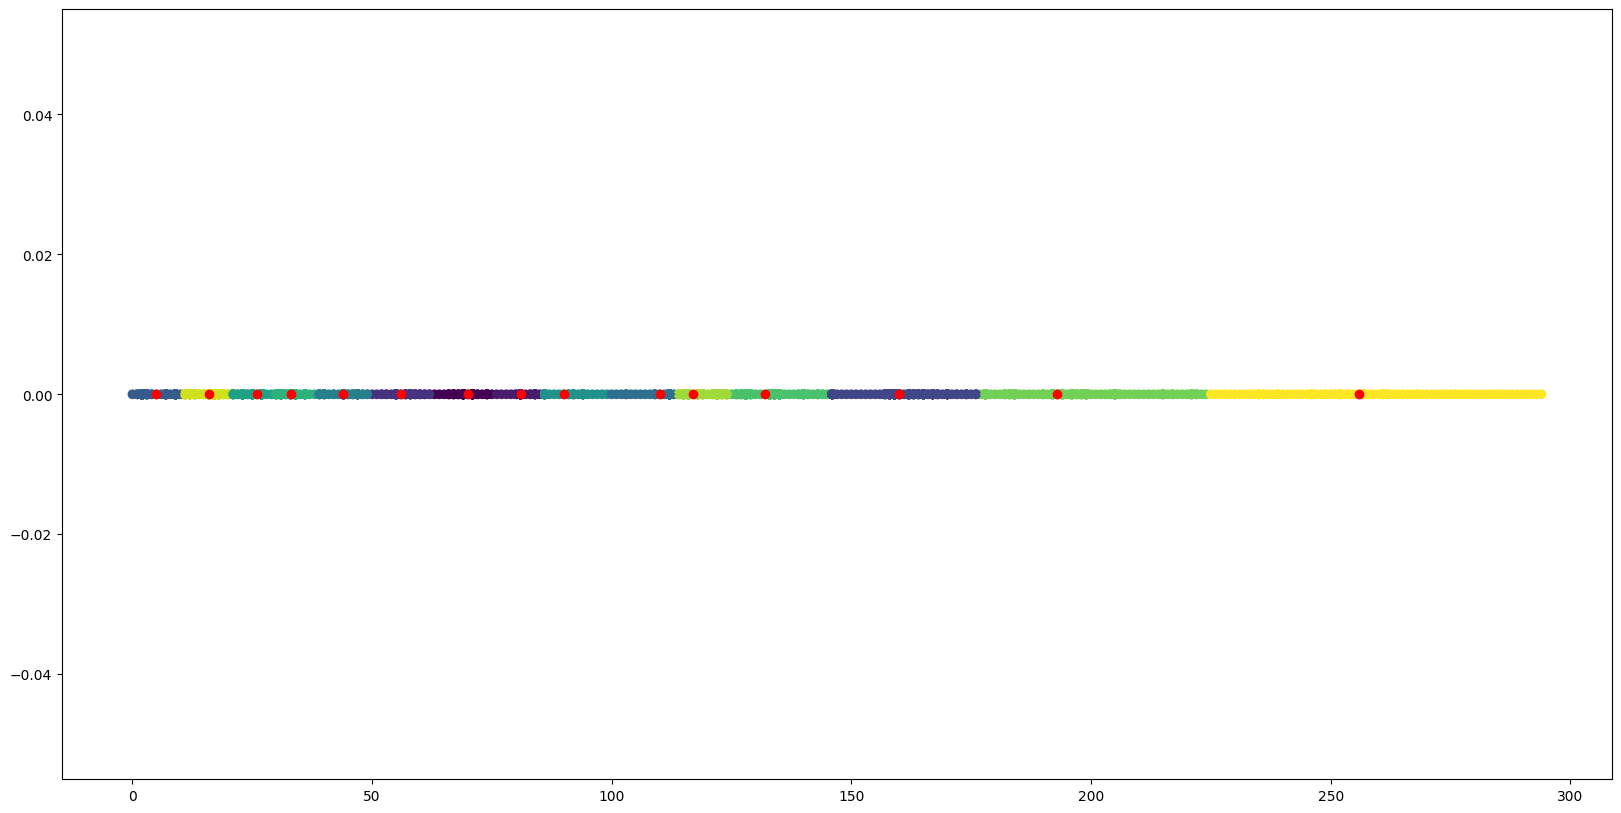

[390, 75, 1072, 417, 488, 276, 145, 255, 437, 96, 198, 189, 982, 42, 130, 76]
Silhouette score for k =  16  is:  0.7361220811941379


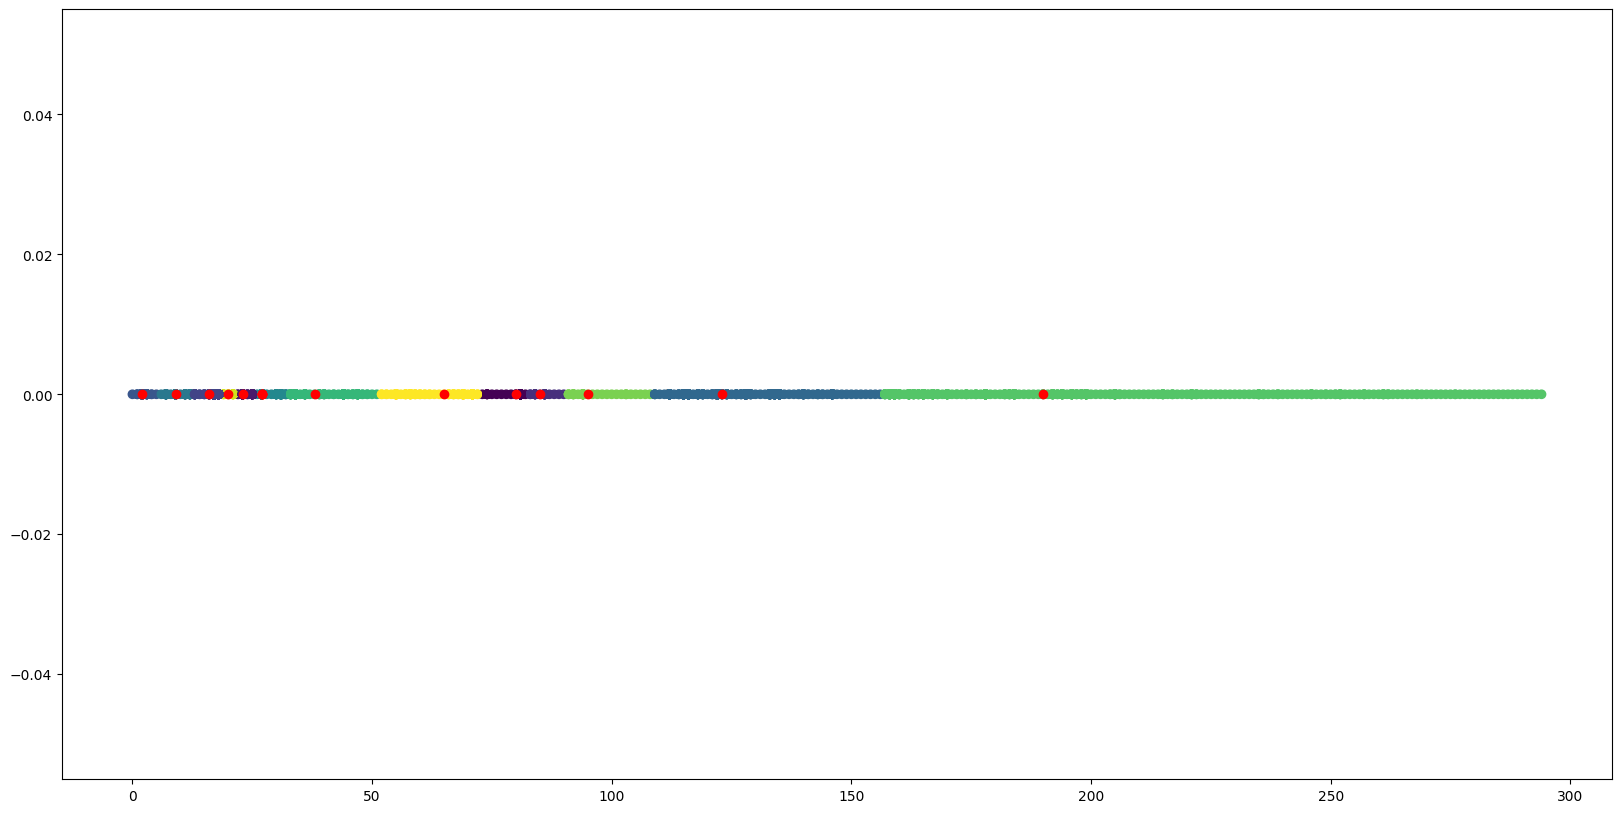

[29, 95, 498, 523, 473, 200, 201, 237, 527, 275, 296, 463, 154, 128, 982, 130, 57]
Silhouette score for k =  17  is:  0.7433722775581005


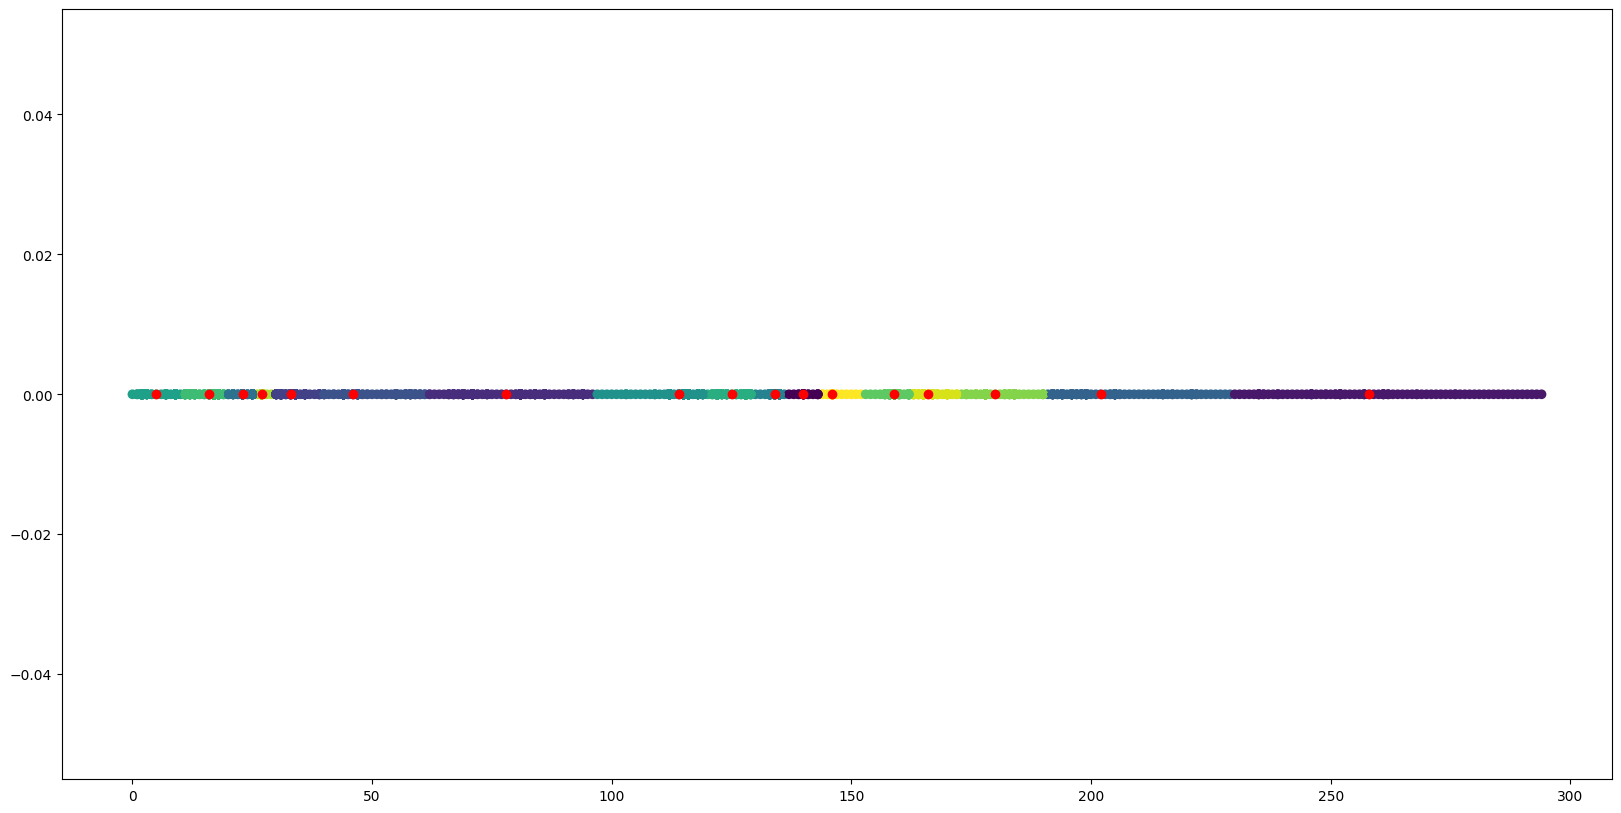

[92, 42, 152, 22, 579, 88, 131, 981, 459, 50, 164, 57, 3, 381, 275, 1125, 375, 292]
Silhouette score for k =  18  is:  0.7767493081304839


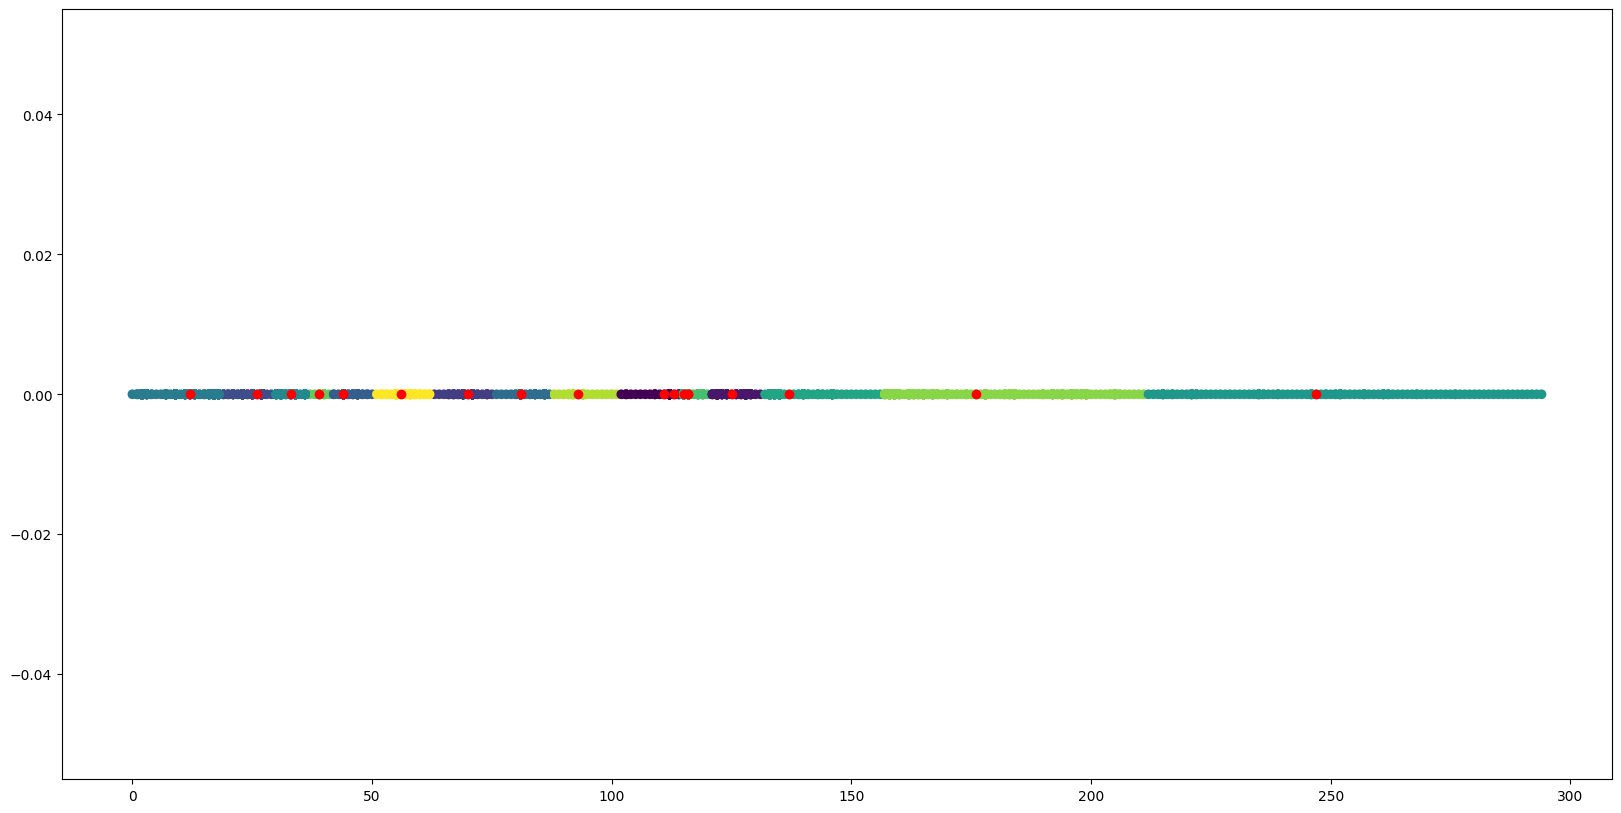

[450, 463, 275, 453, 195, 33, 162, 65, 100, 39, 201, 67, 220, 1000, 358, 499, 389, 255, 44]
Silhouette score for k =  19  is:  0.7377162121123043


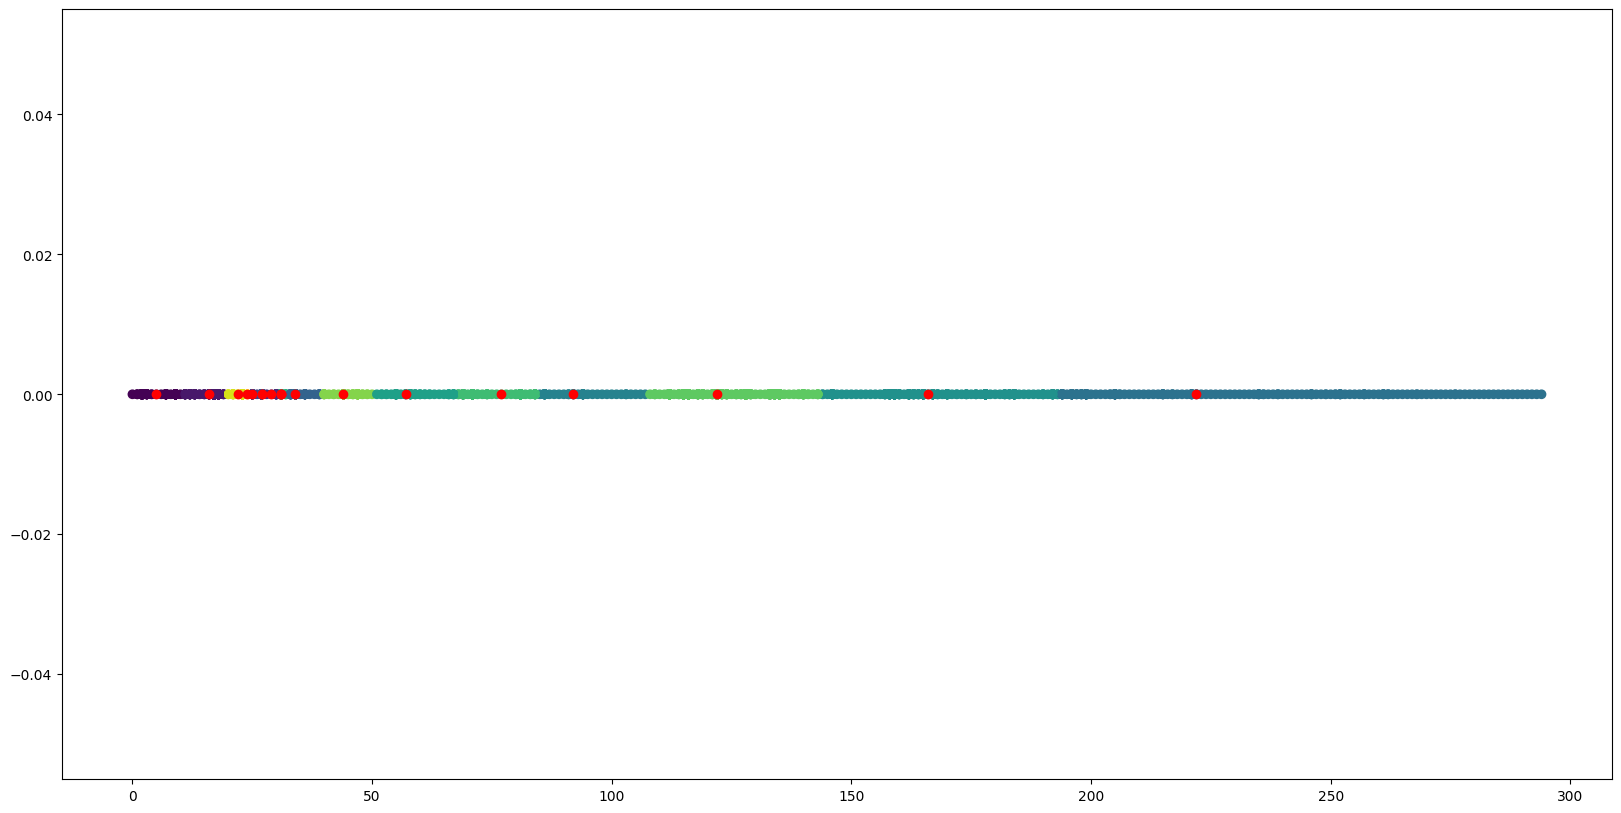

Maximum silhouette score is:  0.7767493081304839 for k =  18


In [20]:
def k_means(X, k, centers=None, total=100):
    # Initialize cluster centers randomly
    random_centers = np.random.choice(X, k, replace=False)
    centers = random_centers

    for _ in range(total):
        # Calculate distances to cluster centers
        distances = np.abs(X - centers[:, np.newaxis])
        
        # Assign points to the nearest cluster
        cluster_assignments = np.argmin(distances, axis=0)
        
        # Update cluster centers
        for i in range(k):
            temp = (cluster_assignments == i)
            if np.any(temp):
                centers[i] = np.mean(X[temp])
    
    return cluster_assignments, centers

y = [0 for i in range(len(df_transformed['Type']))]
a = df_transformed['Type'].to_numpy()


sils = []
for i in range(9, 20):
    cluster_assignments, centers = k_means(a, i)
    # print(cluster_assignments,centers)
    sil_ = sil_with_while(cluster_assignments,centers,i,a)
    print("Silhouette score for k = ", i, " is: ", sil_
          )
    sils.append(sil_)
    # plot all points in their respective clusters
    # plot bigger plot
    plt.figure(figsize=(20,10))
    plt.scatter(a,y,c=cluster_assignments)
    plt.scatter(centers,[0 for i in range(len(centers))], c='red')
    

    plt.show()
print("Maximum silhouette score is: ", max(sils),'for k = ', sils.index(max(sils))+9)






## Q3

[306, 334, 355, 472, 306, 323, 383, 309, 337, 306, 304, 402, 423, 391, 285]
Silhouette score for k =  15  is:  0.6660106225608416


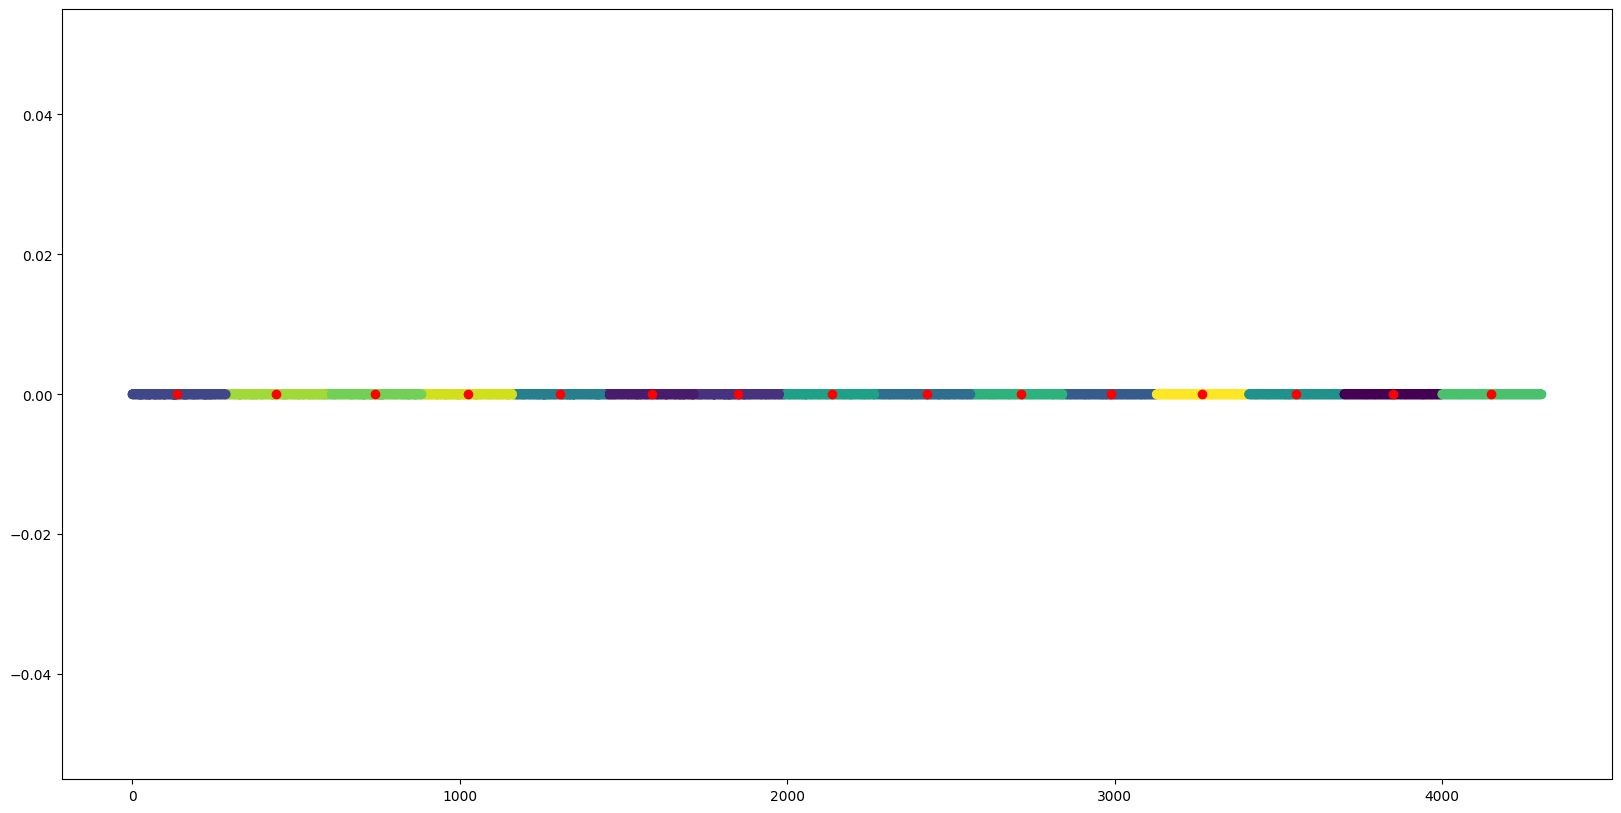

[328, 301, 278, 401, 472, 294, 423, 254, 333, 351, 248, 268, 241, 271, 382, 391]
Silhouette score for k =  16  is:  0.6651468460152928


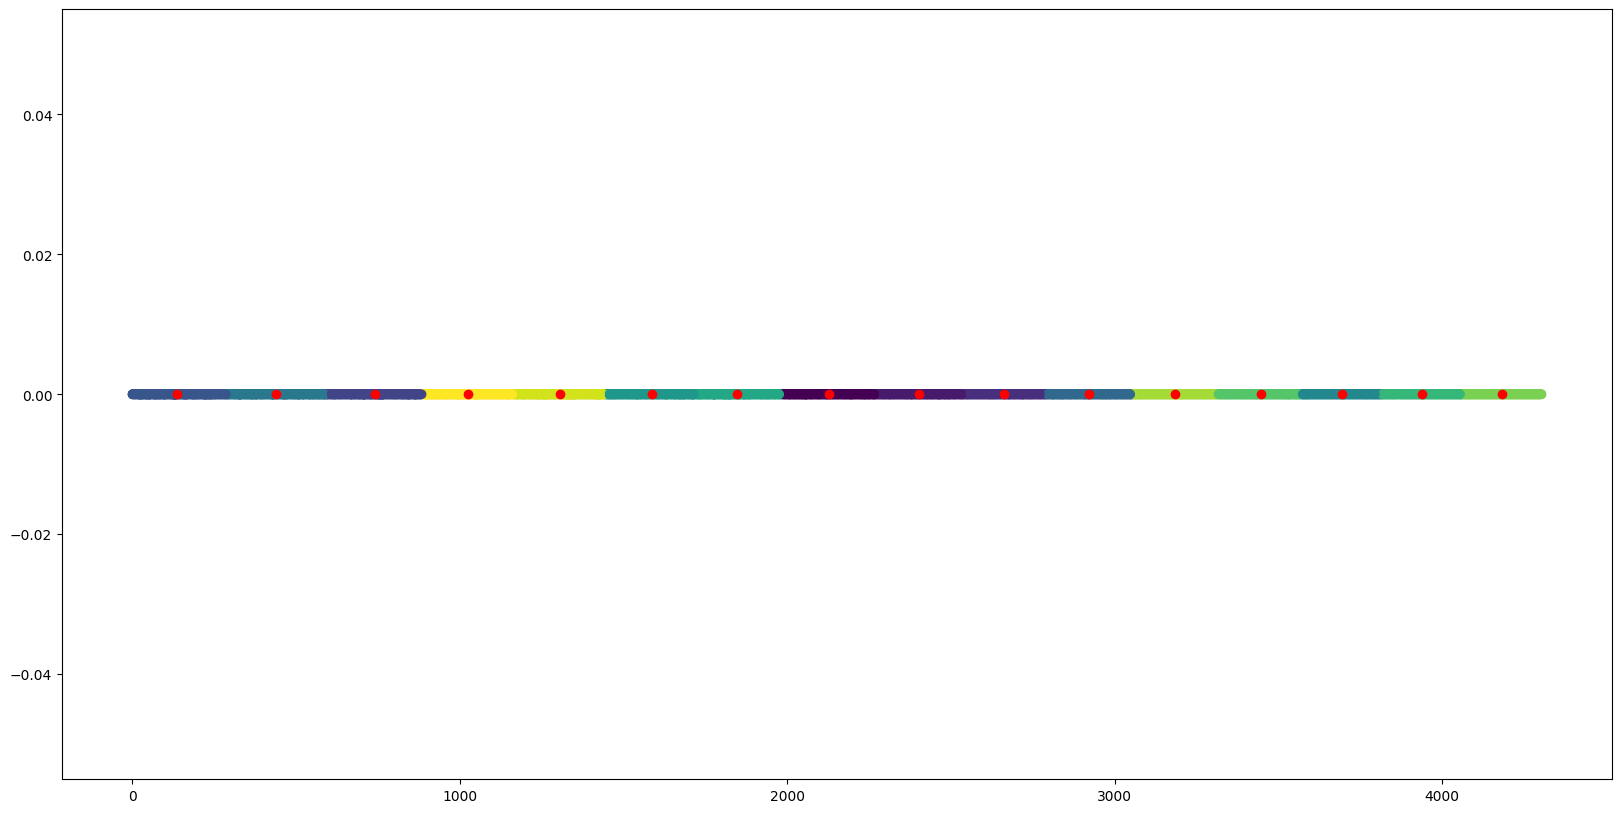

[259, 423, 273, 308, 270, 236, 398, 252, 226, 230, 285, 277, 388, 328, 472, 372, 239]
Silhouette score for k =  17  is:  0.6659430814914433


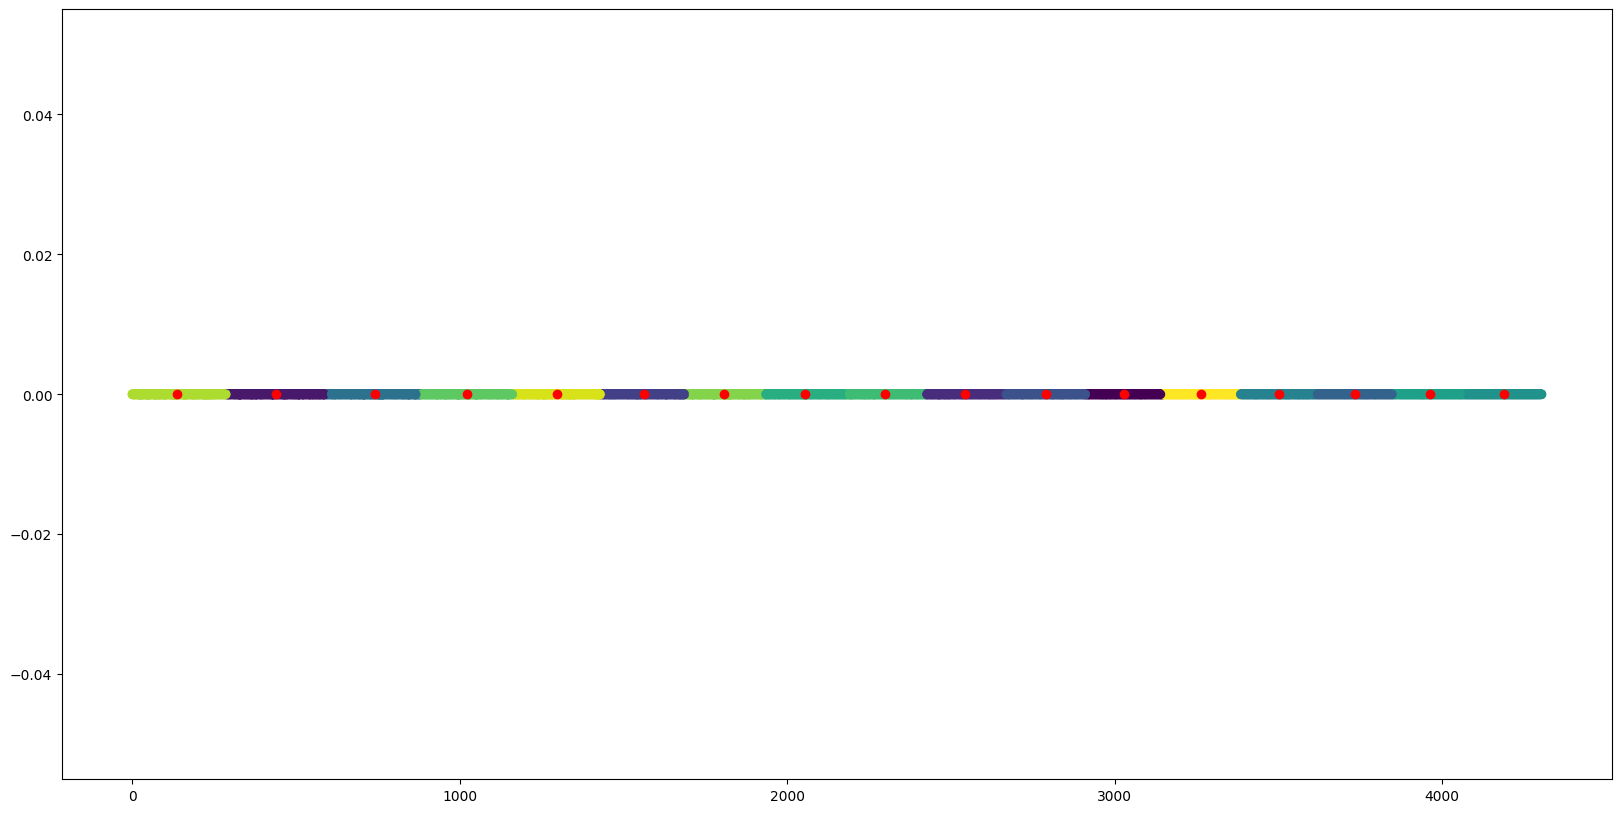

[314, 224, 323, 323, 317, 267, 312, 306, 333, 299, 284, 246, 227, 282, 319, 301, 265, 294]
Silhouette score for k =  18  is:  0.6588633072706227


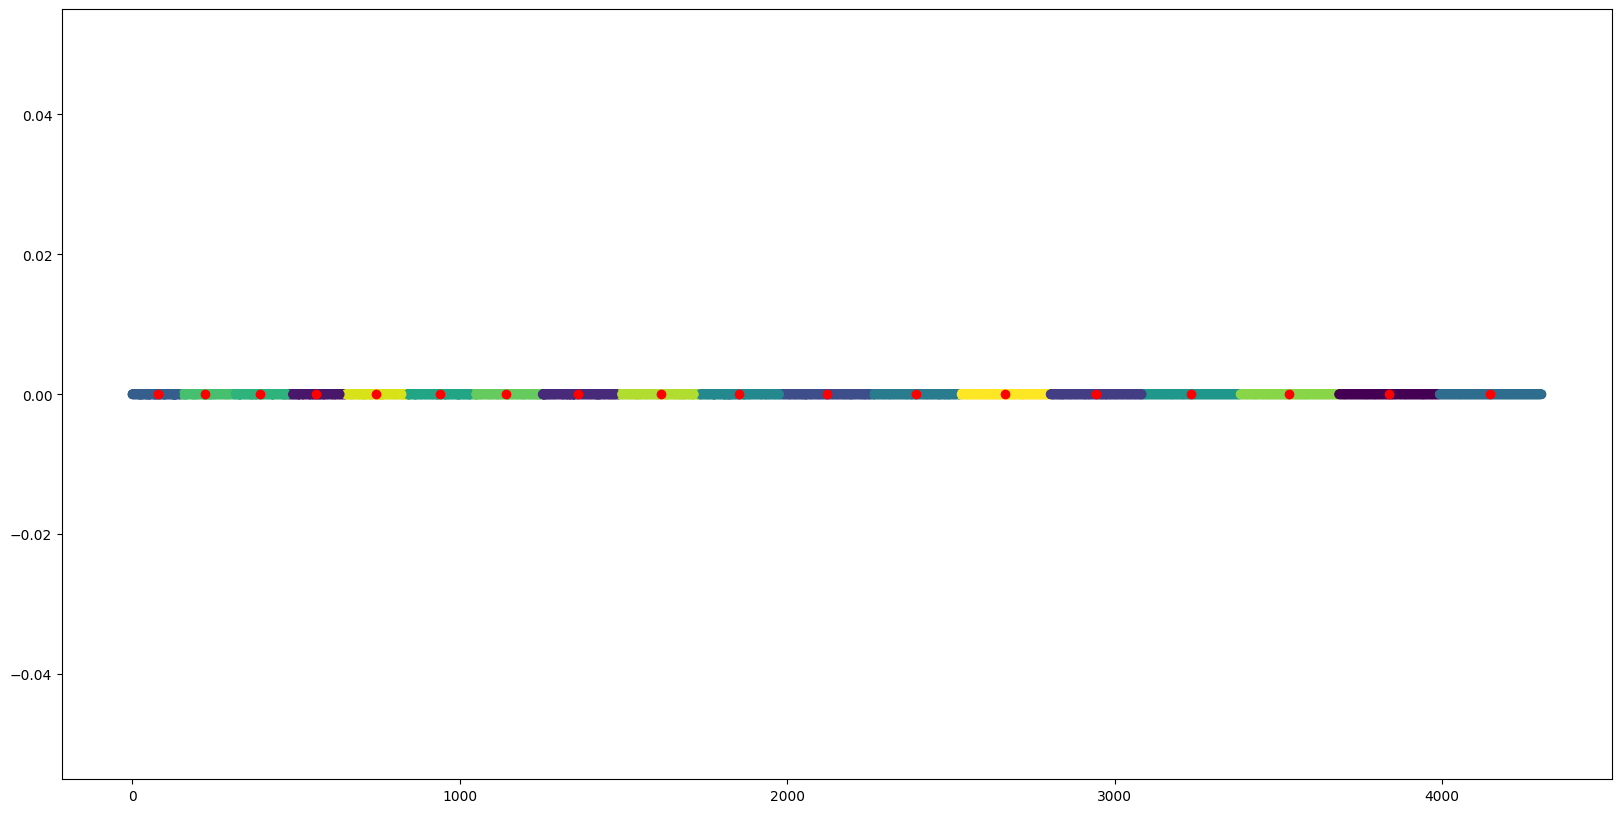

[299, 288, 242, 225, 231, 339, 239, 222, 228, 348, 243, 343, 338, 219, 278, 262, 309, 255, 328]
Silhouette score for k =  19  is:  0.664517221573619


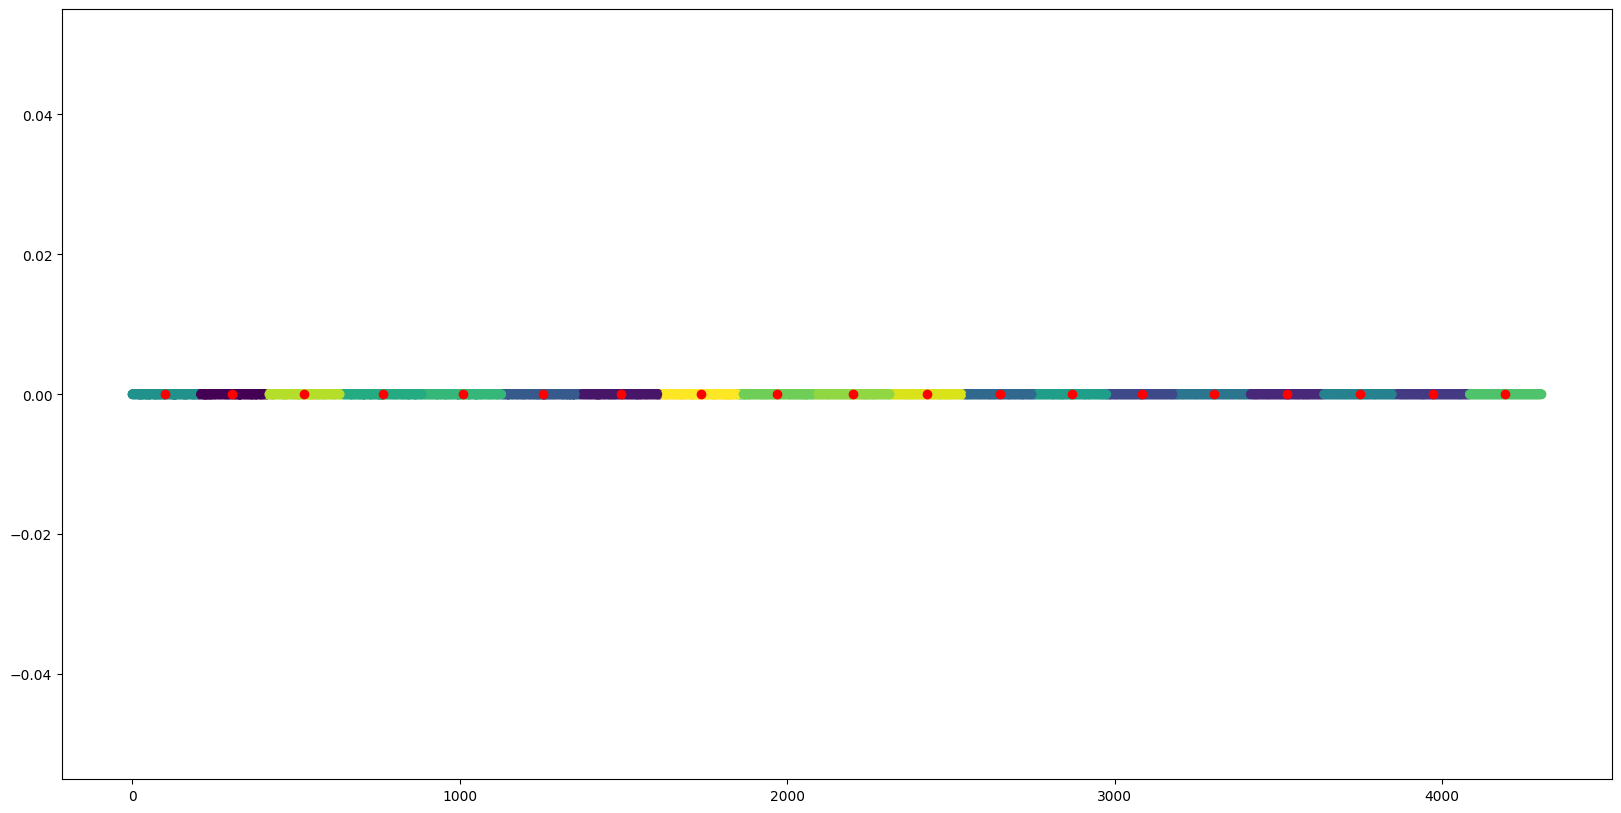

Maximum silhouette score is:  0.6660106225608416 for k =  9


In [21]:
a = df_wwww['Location'].to_numpy()
y = [0 for i in range(len(df_wwww['Location']))]
sils = []
for i in range(15, 20):
    cluster_assignments, centers = k_means(a, i)
    # print(cluster_assignments,centers)
    sil_ = sil_with_while(cluster_assignments,centers,i,a)
    print("Silhouette score for k = ", i, " is: ", sil_
          )
    sils.append(sil_)
    # plot all points in their respective clusters
    # plot bigger plot
    plt.figure(figsize=(20,10))
    plt.scatter(a,y,c=cluster_assignments)
    plt.scatter(centers,[0 for i in range(len(centers))], c='red')
    

    plt.show()
print("Maximum silhouette score is: ", max(sils),'for k = ', sils.index(max(sils))+9)



[325, 362, 376, 293, 465, 200, 316, 213, 512, 532, 302, 239, 296, 517, 288]
Silhouette score for k =  15  is:  0.6725230187293915


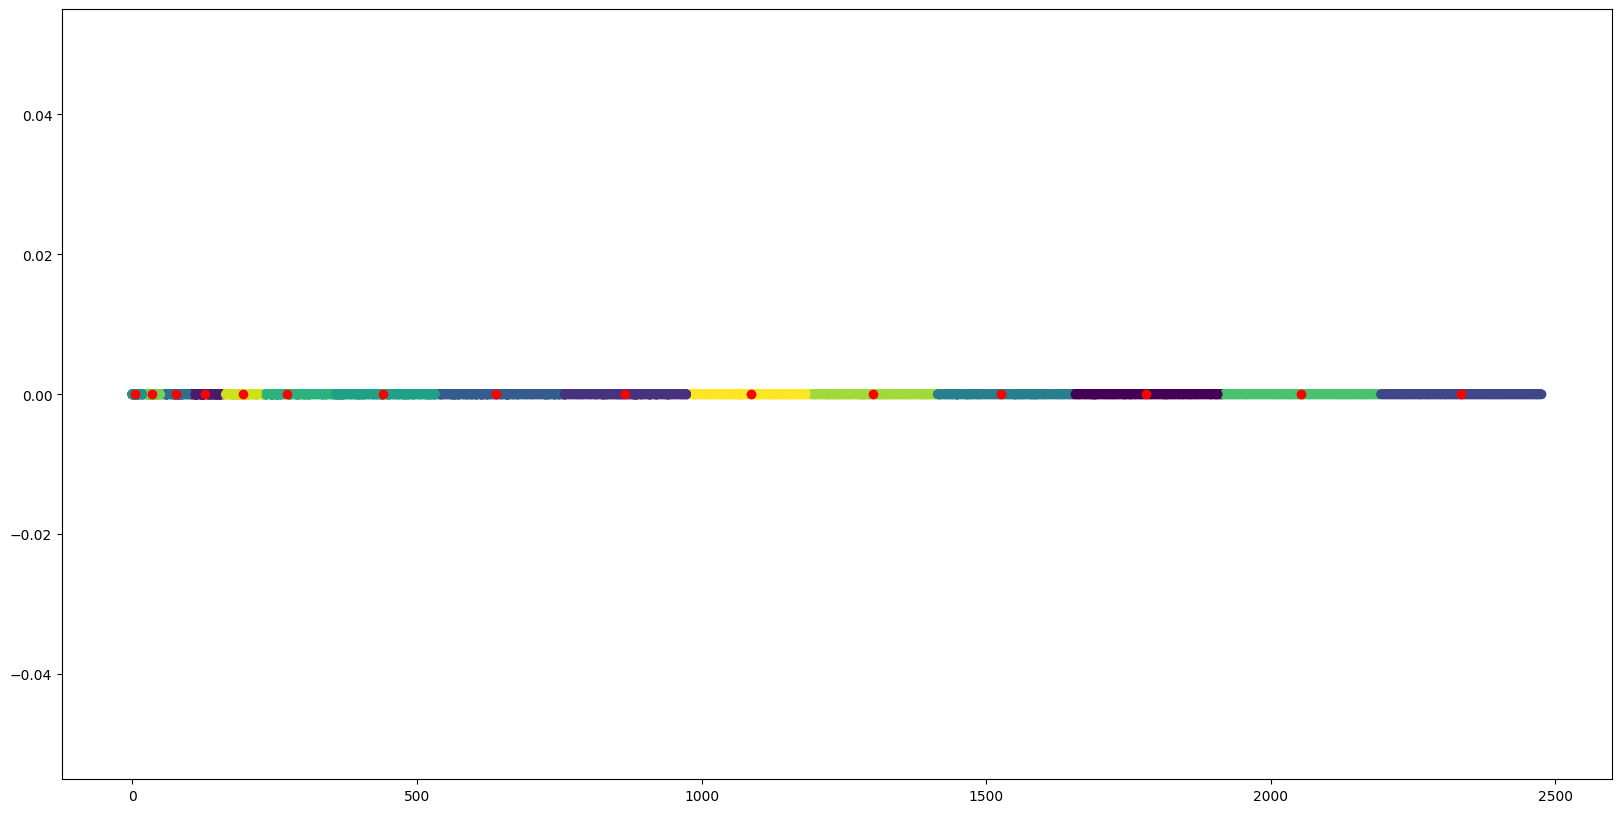

[273, 215, 416, 314, 233, 379, 492, 361, 233, 437, 262, 495, 277, 326, 287, 236]
Silhouette score for k =  16  is:  0.6733979777432233


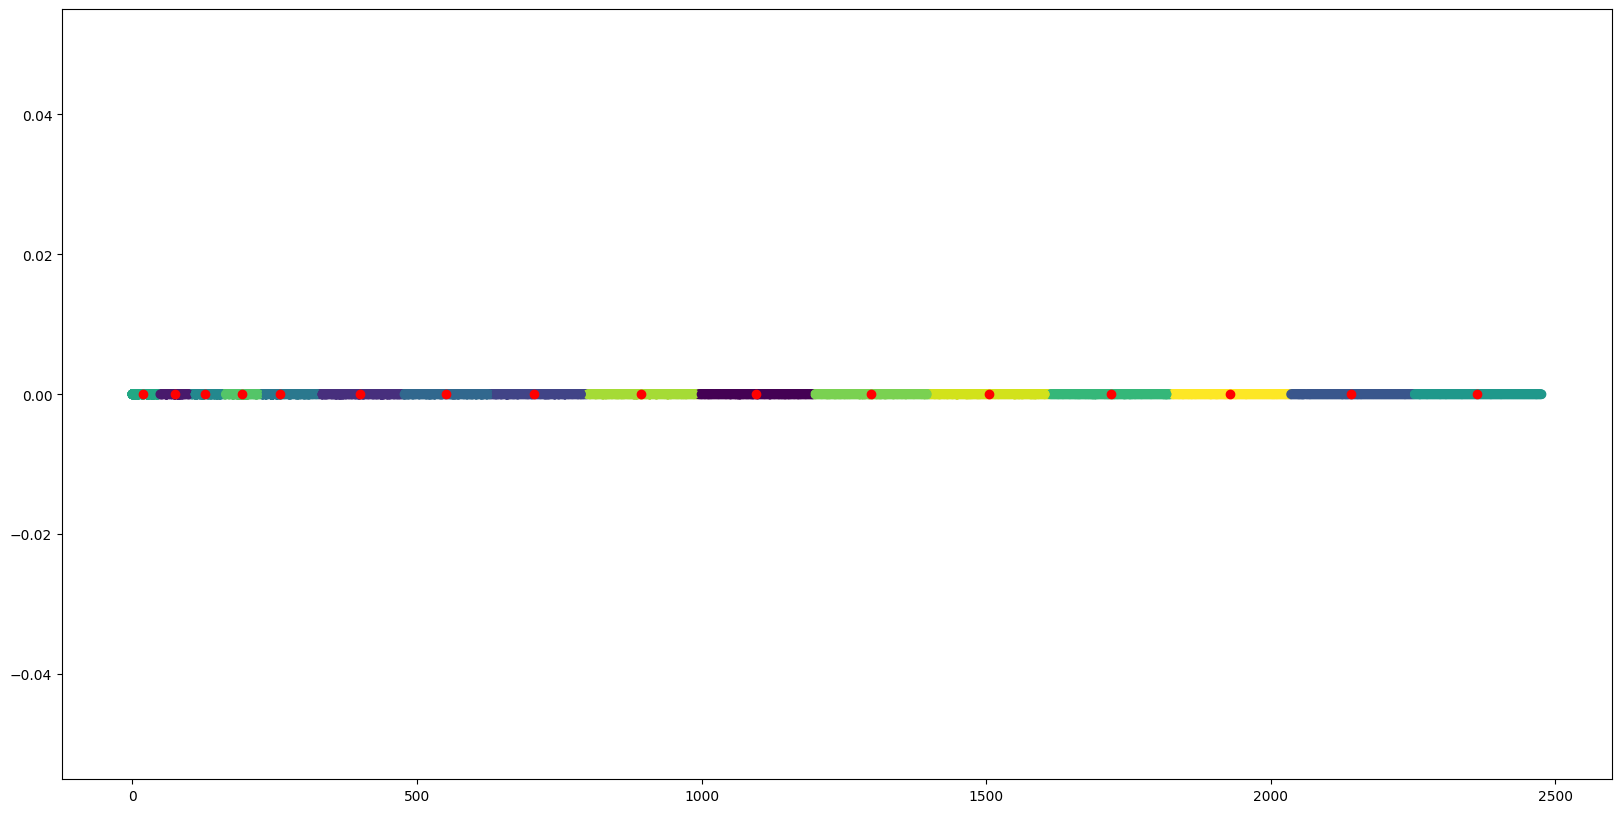

[423, 304, 240, 266, 327, 298, 342, 162, 369, 386, 409, 350, 325, 437, 286, 203, 109]
Silhouette score for k =  17  is:  0.6564695694497527


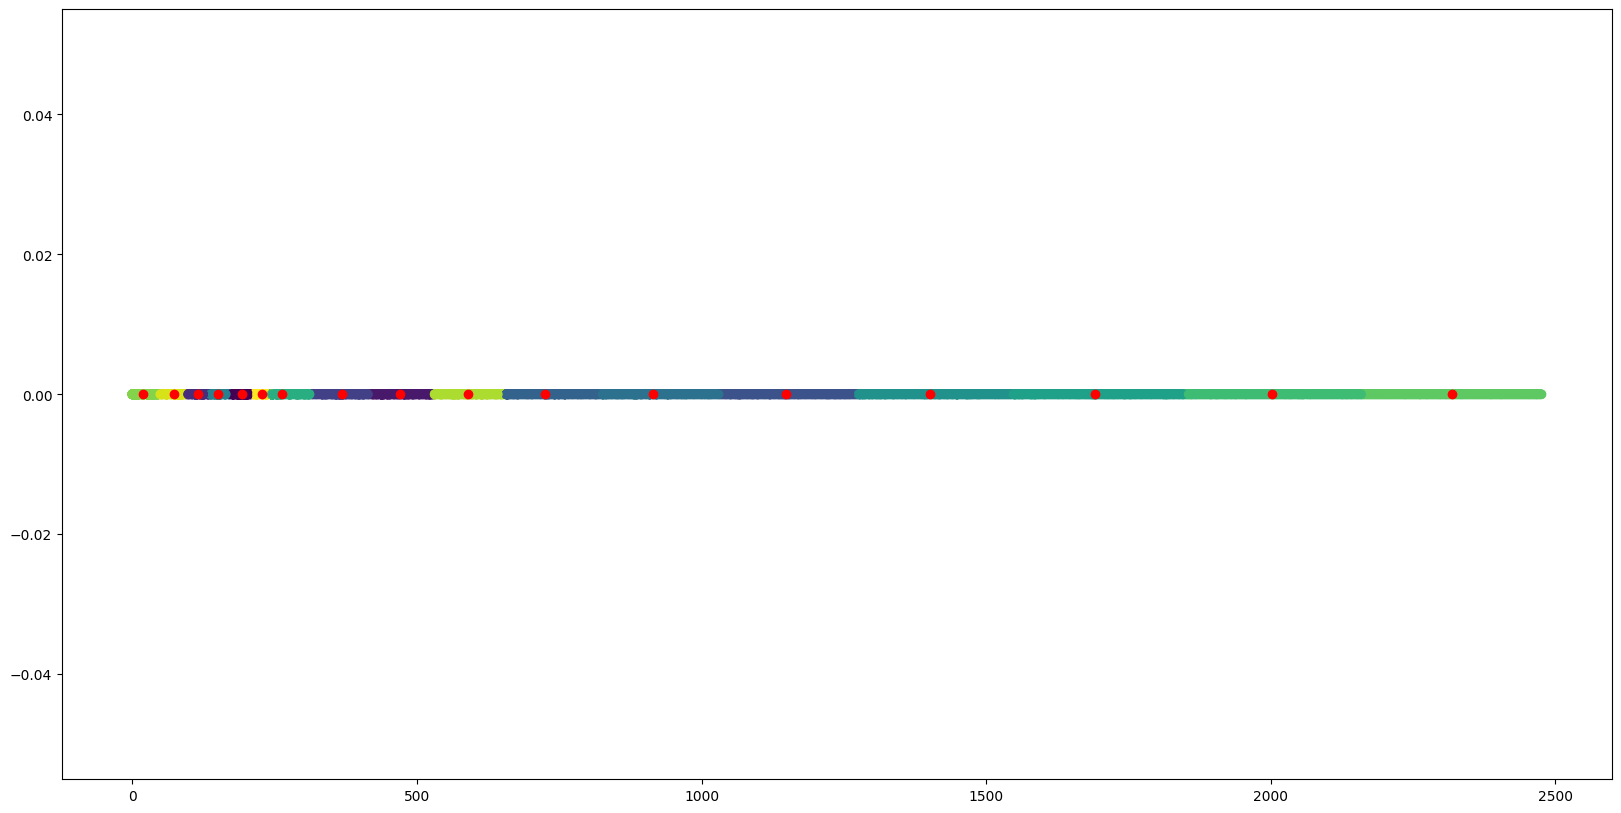

[237, 289, 213, 201, 237, 295, 475, 239, 243, 249, 291, 316, 255, 272, 494, 269, 358, 303]
Silhouette score for k =  18  is:  0.6770759194300582


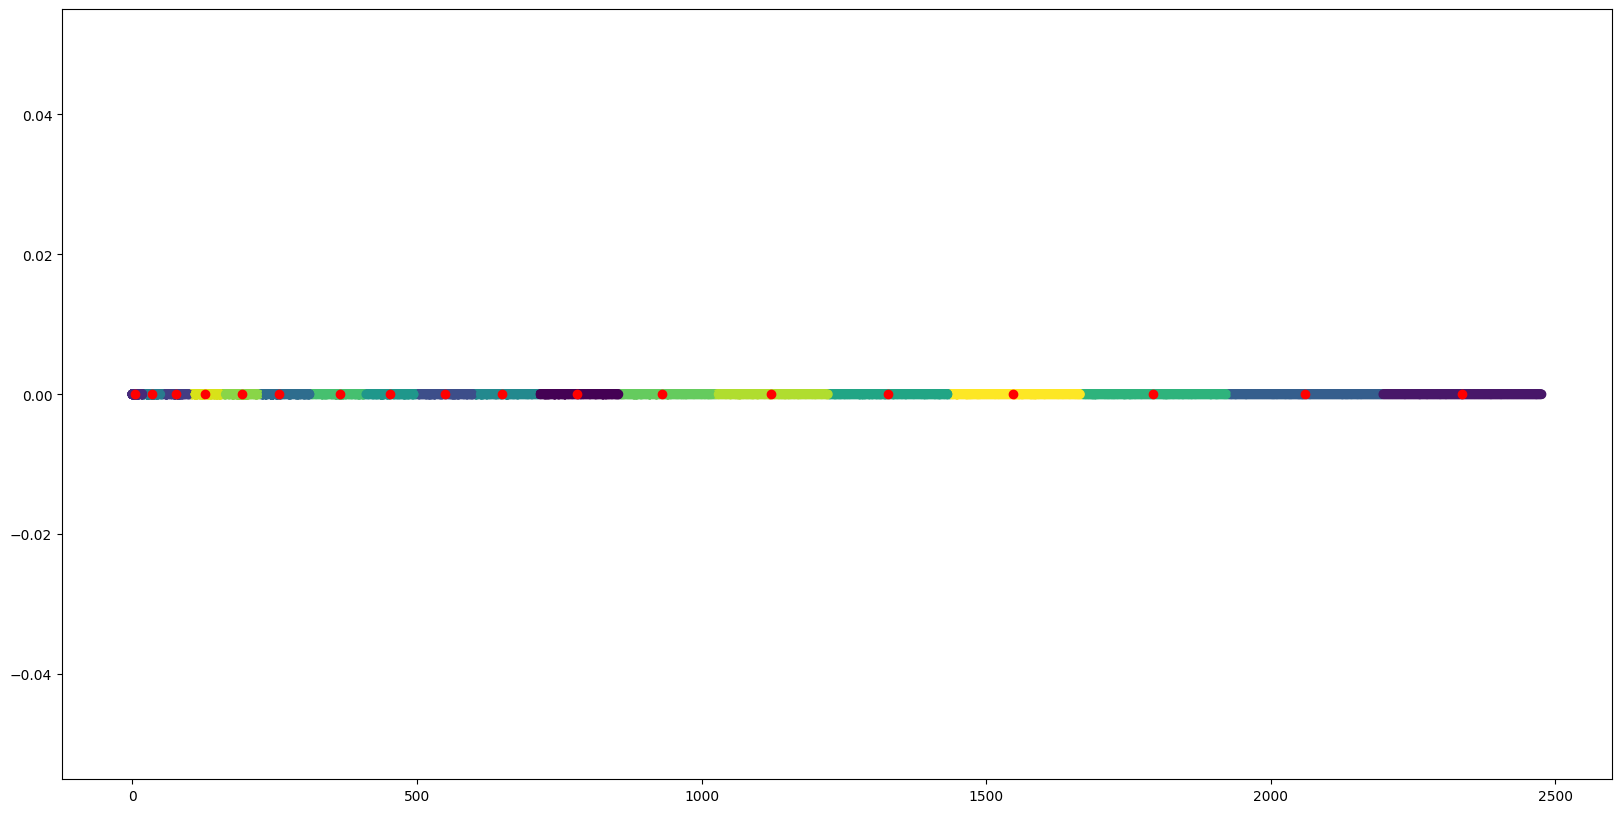

[498, 196, 225, 238, 213, 258, 177, 211, 278, 493, 85, 202, 204, 237, 518, 450, 224, 151, 378]
Silhouette score for k =  19  is:  0.6721877360476419


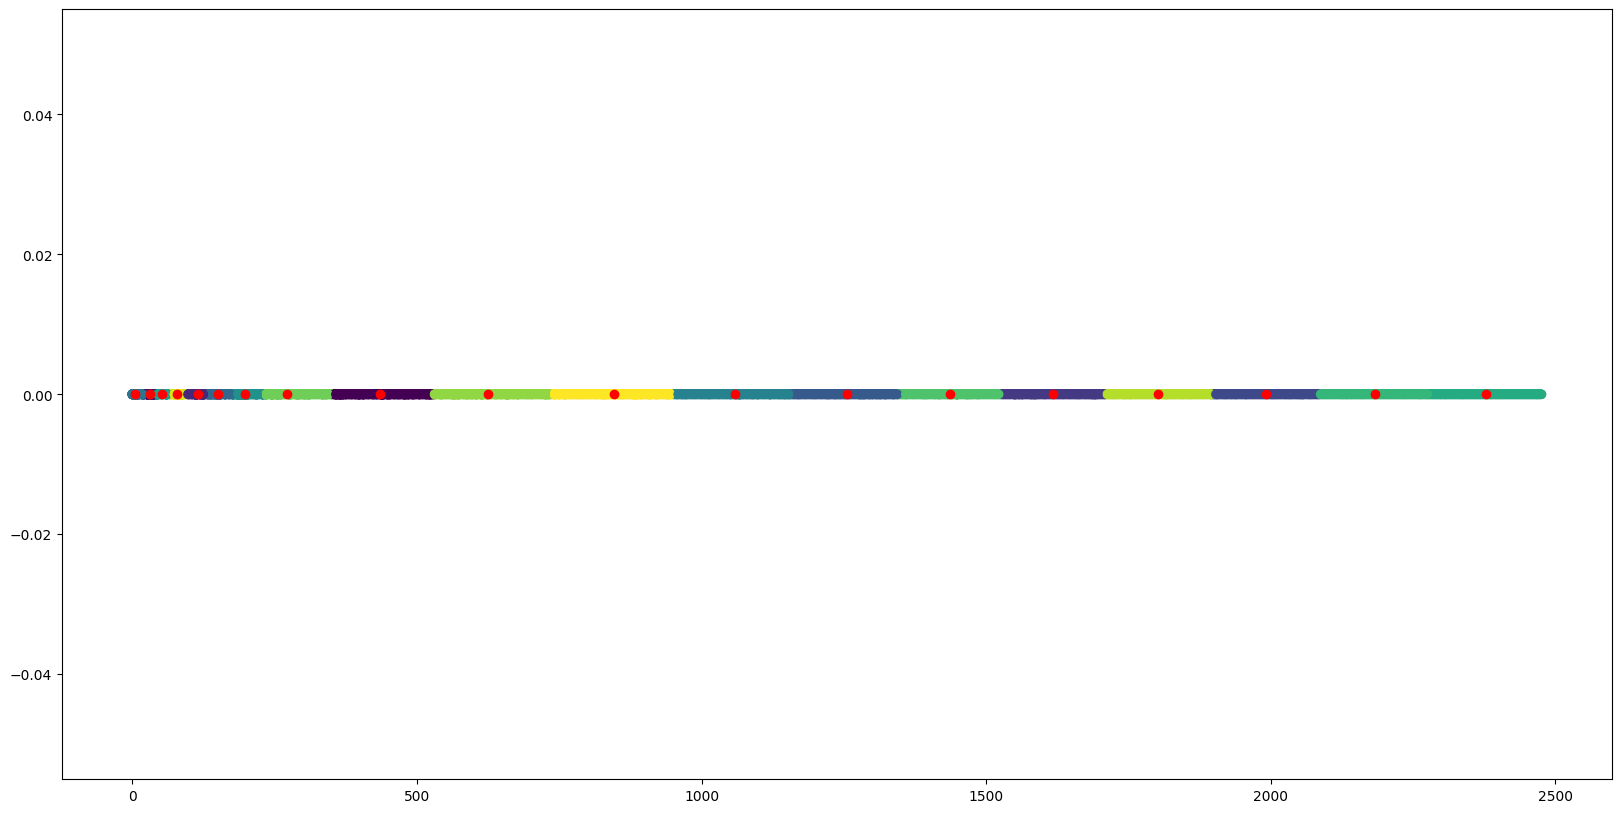

Maximum silhouette score is:  0.6770759194300582 for k =  12


In [22]:
a = df_wwww['Operator'].to_numpy()
y = [0 for i in range(len(df_wwww['Operator']))]
sils = []
for i in range(15, 20):
    cluster_assignments, centers = k_means(a, i)
    # print(cluster_assignments,centers)
    sil_ = sil_with_while(cluster_assignments,centers,i,a)
    print("Silhouette score for k = ", i, " is: ", sil_
          )
    sils.append(sil_)
    # plot all points in their respective clusters
    # plot bigger plot
    plt.figure(figsize=(20,10))
    plt.scatter(a,y,c=cluster_assignments)
    plt.scatter(centers,[0 for i in range(len(centers))], c='red')
    

    plt.show()
print("Maximum silhouette score is: ", max(sils),'for k = ', sils.index(max(sils))+9)

## Q4 

In [23]:
df_transformed.dropna(inplace=True)
fatality_happoned = []
for i in df_transformed['Fatalities']:
    if i>0:
        fatality_happoned.append(1)
    else:
        fatality_happoned.append(0)
df_transformed['fatality_happoned'] = fatality_happoned

In [24]:
crash_counter = {}
i = 0
a =[]
# np.append(a,0)
# iterate over all the rows
for index, row in df_transformed.iterrows():
    # check route and fatality_happoned
    if row['Route'] not in crash_counter and row['fatality_happoned']==1:
        crash_counter[row['Route']] = i
        # print("hello")
        i+=1
        # add to array
        a.append(crash_counter[row['Route']])
    elif row['Route'] in crash_counter and row['fatality_happoned']==1:
        a.append(crash_counter[row['Route']])

a = np.array(a)


In [25]:
print(len(crash_counter))   

886


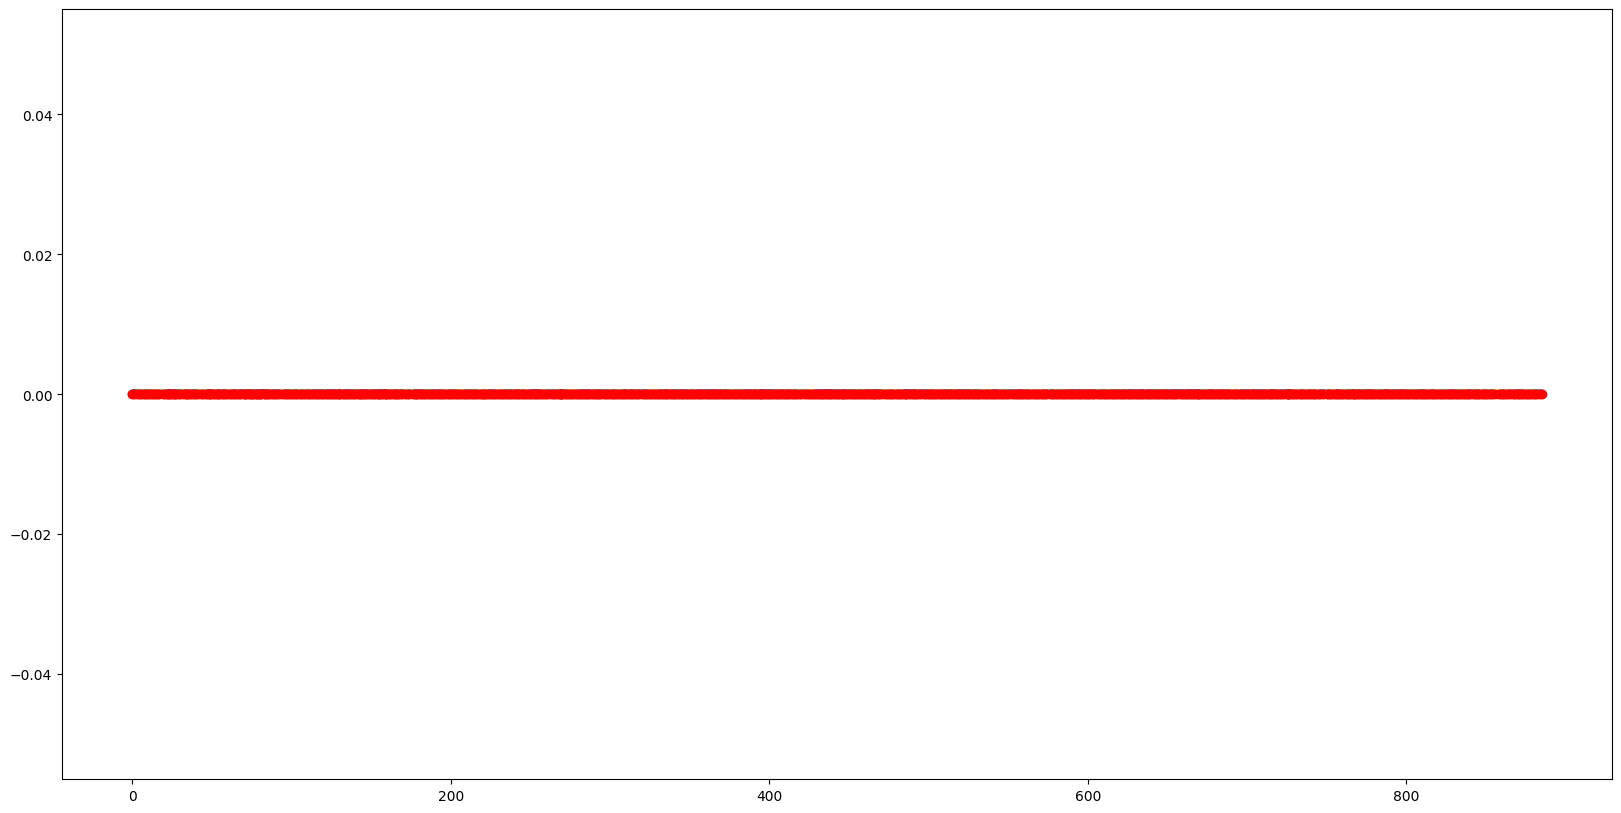

In [26]:
y = [0 for i in range(len(a))]

sils = []
for i in range(886,887):
    cluster_assignments, centers = k_means(a, i)
    # sil_ = sil_with_while(cluster_assignments,centers,i,a)
    # print("Silhouette score for k = ", i, " is: ", sil_
    #       )
    # sils.append(sil_) 
    plt.figure(figsize=(20,10))
    plt.scatter(a,y,c=cluster_assignments)
    plt.scatter(centers,[0 for i in range(len(centers))], c='red')
    plt.show()
# print("Maximum silhouette score is: ", max(sils),'for k = ', sils.index(max(sils))+9)
# check which cluster is which route


The maximum crashes take place in the Training route. In the above plot, there are so many clusters that only the centers of the clusters are visible. 

## Q5
I have used silhoutte score to find the best value for k in the above graphs. For Q4, k = 886. For Q3, for Operator, k = 11 is the best. For Q3, for Location, k = 9 is the best. For Q2, k = 17 is the best. 
The silhoutte score is a measure of how similar an object is to its own cluster compared to other clusters. The value of silhoutte score is between -1 and 1. The higher the value of silhoutte score, the better the clustering.